# Read Data

In [6]:
import numpy as np
import pandas as pd
import os

data_dict = {}
skip = [".DS_Store", "displayModel.m", "displayTrial.m", "MANUAL.txt", "README.txt"]
files = os.listdir("HMP_Dataset/")
for file_name in files:
    if file_name not in skip:
        path = "HMP_Dataset/" + file_name
        files = os.listdir(path)
        data = []
        index = 0
        for name in files:
            tmp = pd.read_csv(path + "/" + name, sep=" ", header=None).values
            data = np.vstack([data, tmp]) if len(data) else tmp
            data_dict[file_name + "/" + str(index)] = data
            index += 1

# Vector quantization 

In [53]:
import math

# Cut and flatten signals 
def preprocessing_data_dict(data_dict):
    preprocessed_data_dict = {}
    sample_size = 32
    for key in data_dict:
        size = len(data_dict[key])
        x = 0.5 # overlap parameter
        cut = [data_dict[key][i:i+sample_size] for i in range(0, size, int(sample_size*x))]
        filtered = [x for x in cut if len(x) == sample_size]
        preprocessed_data_dict[key] = np.array([np.array([j for i in e for j in i]) for e in filtered])
    return preprocessed_data_dict
preprocessed_data_dict = preprocessing_data_dict(data_dict) 

In [54]:
data = []
for key in preprocessed_data_dict:
    data = np.vstack([data, np.array(preprocessed_data_dict[key])]) if len(data) else np.array(preprocessed_data_dict[key])
print len(data)

1075180


In [55]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

y = []
X = []
label_dict = {}
label_mapping = ["Brush_teeth", "Climb_stairs", "Comb_hair", "Descend_stairs", "Drink_glass", "Eat_meat", "Eat_soup", "Getup_bed", "Liedown_bed", "Pour_water", "Sitdown_chair", "Standup_chair", "Use_telephone", "Walk"]
cluster_centers = []
print "Starting clustering"
#kmeans = KMeans(n_clusters=100).fit(data) #480 clusters
#kmeans = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(data)
#for d1 in np.array_split(data, 0):
cluster_1 = KMeans(n_clusters=40).fit(data)
clusters = {i: data[cluster_1.labels_ == i] for i in range(cluster_1.n_clusters)}
for d2 in clusters:
    cluster_2 = KMeans(n_clusters=12).fit(clusters[d2])
    if len(cluster_centers):
        cluster_centers = np.vstack([cluster_centers, cluster_2.cluster_centers_])
    else:
        cluster_centers = cluster_2.cluster_centers_
print "End of clustering"


Starting clustering
End of clustering


In [56]:
import re

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(cluster_centers, np.arange(0, 480))
for key in preprocessed_data_dict:
    k = re.sub(r'[^a-zA-Z_]+', '', key)
    x = np.zeros(480)
    print knn.predict(preprocessed_data_dict[key])
    for e in knn.predict(preprocessed_data_dict[key]):
        x[e] += 1 
    print x
    if k in label_dict:
        label_dict[k] = np.vstack([label_dict[k], np.array(x)])
    else:
        label_dict[k] = np.array(x)
    X.append(x)
    y.append(label_mapping.index(k)) 
#for key in preprocessed_data_dict:
 #   if i % 10 == 0:
  #      print i
  #  k = re.sub(r'[^a-zA-Z_]+', '', key)
   # tmp = kmeans.predict(preprocessed_data_dict[key]) # transform to get a freq vector from each file
   # x = np.zeros(100)
   # for v in tmp:
   #     x[v] += 1 
   # label_dict[k] = np.vstack([label_dict[k], np.array(x)]) if len(label_dict[k]) else np.array(x)
   # X.append(x)
   # y.append(label_mapping.index(k)) 



[194 194 447 158 460 423 238 167 457 296 372 372 372 372]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 4. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 3. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 5. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[424 431 206 ...  97 165   5]
[  0.   4.   0.   0.   0.  11.   1.   0.   0.   0.   0.   3.  64.  44.
   3.  56.  64.   0.   8.  54.  98.  30.  59.  68.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   5.   1.   0.   4.
   0.  10.   2.   0.   1.   2.  80.  70.  43.  52.  25.   0.  42.  71.
  71.  32.  46.  56.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   5.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  56.   0.   6.  61.  61.   0.   3.  17.  78.  67. 168.  68.
   0.  80.  85.   3.  10.  43.  42.  53.   6.  55.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  12.   2.   1.   5.   7.   0.   8.   0.   1.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[424 431 206 ...  97 165   5]
[  0.   4.   0.   0.   0.  12.   1.   0.   0.   0.   0.   3.  66.  46.
   3.  61.  64.   0.   9.  55.  98.  30.  61.  78.   0.   1.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   5.   2.   0.   4.
   0.  10.   2.   0.   1.   2.  84.  71.  44.  53.  25.   0.  42.  74.
  74.  35.  46.  58.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   5.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  56.   0.   6.  62.  61.   0.   3.  17.  81.  67. 198.  75.
   0.  85.  86.   3.  11.  45.  43.  57.   6.  59.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  12.   2.   2.   5.   7.   0.   9.   0.   1.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[424 431 206 ... 401 405 401]
[  0.   4.   0.   0.   0.  13.   1.   0.   0.   0.   0.   3.  69.  51.
   3.  65.  64.   0.   9.  59. 101.  32.  66.  79.   0.   1.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   5.   2.   0.   4.
   0.  10.   2.   0.   1.   2.  87.  73.  49.  57.  25.   1.  48.  79.
  74.  36.  46.  63.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   5.   0.   1.   0.   2.   3.   4.   0.   1.   0.   0.
   4.  34.  60.   0.   6.  67.  62.   0.   3.  18.  88.  73. 199.  75.
   0.  85.  86.   3.  11.  45.  43.  58.   7.  59.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  13.   2.   2.   6.   7.   0.   9.   0.   1.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[22.  0. 12.  0. 20.  0.  4.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 17.  8.  0. 26.  0.  3. 14.  6.  0.
 18. 21. 43. 15.  0. 50.  0. 31.  5. 14. 18.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 73. 18. 19. 54.  0. 56.  0.  0. 73. 57.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.
 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 12. 36. 27.  7. 12. 33. 31. 13. 19.  0.  0.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4. 26.  0. 12.  2. 10.  0

[ 99  99 104 ... 414 356 163]
[ 1.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  8. 23.  0. 13. 19.  0.
 27. 13.  6. 14. 25.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  7. 19. 21. 12. 13.  0.
 13.  8.  1. 25. 14. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 31. 45.  0.  1. 37.
 47.  1.  0. 18. 25. 13. 22. 10.  1. 50. 20.  1. 10. 34. 12.  2.  4. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  1.
  2.  1.  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  8.  0.  0.  0.
  7.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  4.  0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  1.  1.  3.  1.  2.
  2.  2.  0.  0.  0. 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 6. 0. 2. 2. 1. 0. 0. 2. 1. 0. 0. 1. 0. 0. 4. 6. 0. 3. 0. 1. 6. 1. 0.
 1. 2. 1. 0. 3. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0.
 2. 0. 0. 0. 0. 0. 1. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 3. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 4. 0. 1. 1. 5. 3. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 3. 0. 0. 3. 5. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 3. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 4. 0. 0.

[ 62  62  62  62  62  62  62  71  62  69 261 339 292 298 318 317 370 425
 422 426 423 405 398 398 387 393 387 387 387 387 387 387 393 129 120 120
  80 394 403 398 405 452 447 444 451 391 452 447 198 198 198 198 406 108
 118 118 117 177  24  27  26 424 129 371 364 126 265 233  97  96 100 100
 100 355 223 319 314 314 314  72  76  76  77 389 393 386 391  98  92  93
 104  16 201 201 201  88  88 216 292 312  75 139 142 331 331 137 137 137
 335 335 335 335 335 326 326 326 326 333 138 186  75  87  88  84  90  90
 353 219 343 343 343 343 343 343 343 343 437  81  73 348 227 275  87  90
  94  93  93  93  93 348 218 150 154  40  36  36 146 429 235  93 197 196
 198 194  97 449 194 194 409]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 2. 2. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 2. 3. 0. 3. 0. 1. 6. 1. 0.
 1. 2. 1. 0. 3. 0. 0.

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  4.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3. 11.  0.  0.  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  2.  0.  0.  1.  9.  0.
  7.  0.  0.  0.  1.  0.  8.  1.  0. 26. 19.  0. 14. 13.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  4.  7.  0.
  1.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  9.  1.  0.  0.  0.  0.  1.  1.  0.  2.  0.  3.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  3.  6.  0.  4.
  3.  1.  3.  7.  5.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  3.  2.  0.  3.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  3.  1.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  4.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3. 11.  0.  0.  3.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  2.  0.  2.  1.  9.  0.
  8.  0.  0.  0.  1.  0.  8.  1.  0. 26. 25.  0. 14. 13.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  4.  7.  0.
  1.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  9.  1.  0.  0.  0.  0.  1.  1.  0.  2.  0.  3.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  3.  6.  1.  4.
  3.  1.  3.  8.  5.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  4.  2.  0.  4.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  2.
  3.  1.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  5.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3. 11.  0.  0.  3.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  2.  0.  2.  1.  9.  0.
  8.  0.  0.  0.  1.  0.  8.  2.  0. 26. 28.  0. 14. 13.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  4.  7.  0.
  4.  6.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  1.  2.  0.  0.  9.  2.  1.  0.  0.  0.  1.  1.  0.  2.  0.  3.  0.
  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  4.  6.  1.  4.
  3.  1.  3.  8.  5.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  4.  2.  0.  4.  2.  0.  0.  0.  2.  0.  0.  0.  0.  0.  2.
  3.  1.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  5.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3. 11.  0.  0.  3.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  3.  0.  2.  1.  9.  0.
  9.  0.  0.  0.  1.  0.  8.  2.  0. 26. 29.  0. 14. 13.  0.  0.  1.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  6.  7.  0.
  6.  6.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  1.  2.  0.  0.  9.  2.  1.  0.  0.  0.  1.  1.  0.  2.  0.  3.  0.
  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  4.  6.  1.  5.
  3.  1.  3. 10.  5.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  5.  2.  0.  4.  2.  0.  0.  0.  2.  0.  0.  0.  0.  0.  3.
  3.  1.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  6.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3. 11.  0.  0.  4.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  3.  0.  2.  1.  9.  0.
 11.  0.  0.  0.  1.  0.  8.  2.  0. 26. 36.  0. 15. 13.  0.  0.  1.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  6.  7.  0.
  6.  7.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  1.  2.  0.  0. 10.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  3.  0.
  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  4.  6.  1.  5.
  3.  1.  3. 10.  5.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  5.  2.  0.  5.  2.  0.  0.  0.  2.  0.  0.  0.  0.  0.  3.
  3.  1.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0

[424 431 206 ...  99  99  99]
[  0.   4.   0.   0.   0.  10.   1.   0.   0.   0.   0.   2.  57.  38.
   2.  52.  63.   0.   7.  49.  90.  28.  50.  58.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   4.   0.   0.   4.
   0.  10.   2.   0.   1.   2.  71.  58.  37.  43.  23.   0.  38.  62.
  62.  28.  45.  50.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   3.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  56.   0.   6.  58.  61.   0.   3.  16.  77.  66. 147.  58.
   0.  68.  84.   3.   8.  28.  40.  38.   5.  48.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   5.   1.  15.   0.
   7.   2.   2.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   7.  12.   2.   1.   4.   6.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[62 62 62 ... 88 88 88]
[ 0.  3.  0.  0.  0.  0.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  6. 27.  2.  0.  1.  2.  0.  0.  1.  6.  2.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  1.  3.  3. 13.  4.  1.  4.  0.  2. 33. 15.  0.  6.
  7. 19.  1. 12. 10. 15.  8.  5. 24. 11. 11.  1.  8.  1.  2. 14. 13.  2.
 51.  0. 19. 59.  1.  0. 44.  2.  3.  8. 65.  1. 54. 86.  5.  2.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  1.  7.  0. 12.  0. 18.  8. 11.  1.
 13.  4. 15.  6.  1.  0.  6. 10.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  1.  0.  4.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  1.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 24. 31.  9. 10.  6.  0.  1. 13.  1.  4.  5.  3.  0.  7. 17.  3.  3.  7.
 25. 13.  5. 27. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  1.  2.  4.  5.  4.  3.  2.  7.  0.  5.  1.  0.  1.  0.  0.  7.
  7. 13.  0.  1.  4.  1.  2

[ 62  62  62 ... 201 199 199]
[ 0.  3.  0.  0.  0.  0.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  7. 27.  2.  0.  1.  2.  0.  1.  1.  6.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  3.  1.  3.  3. 15.  4.  1.  7.  0.  2. 33. 16.  0.  6.
  9. 19.  1. 12. 11. 15.  8.  6. 24. 12. 11.  1.  8.  1.  2. 14. 13.  2.
 51.  0. 19. 59.  1.  0. 48.  2.  3.  9. 69.  1. 54. 91.  6.  2.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  1.  7.  0. 12.  0. 18.  8. 12.  1.
 13.  4. 15.  6.  1.  0.  6. 10.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  5.  1.  0.  0.  1.  1.  1.  0.  4.  1.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  1.  4.  1.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 24. 31.  9. 10.  6.  0.  1. 13.  1.  4.  5.  3.  0.  7. 19.  4.  3.  7.
 25. 15.  5. 29. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  2.  2.  4.  5.  4.  3.  3.  7.  0.  5.  1.  0.  1.  0.  0.  8.
  8. 13.  0.  1.  4. 

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. 11.  1.  1.  0.  6.  0.  1.  3. 21.  0.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  2.  0.  0.  0.  0.  4.  0.  1.  1.  0.  0.  0.
 13.  2.  0.  3. 17.  0.  2.  4.  7.  1.  1.  0.  2.  0.  0.  1.  2.  0.
  1.  0.  1.  1.  0.  0.  7.  0.  0.  3.  7.  2.  1.  4.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  3. 14.  0.
  5.  0.  2.  3.  0.  0.  0.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.
  0.  0.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  1.  6.  6.  2.  4.  1.  1.  0.  1.  3.  0.  0.  2.  8.  0.  0.  3.
  7.  3.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  5.  0.  1.  0.  2.  1.  2.
  5.  0.  0.  0.  1.  0.  2. 16.  0.  1.  1.  0.  0

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. 11.  0.  0.  0.  6.  0.  0.  2.  7.  0.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  7.  2.  0.  1.  5.  0.  1.  3.  4.  1.  1.  0.  2.  0.  0.  0.  2.  0.
  0.  0.  1.  1.  0.  0.  2.  0.  0.  3.  6.  1.  1.  3.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  1.  0.
  5.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  1.  4.  4.  1.  3.  0.  1.  0.  1.  3.  0.  0.  0.  7.  0.  0.  1.
  3.  3.  1.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  4.  0.  0.  0.  1.  1.  1.
  2.  0.  0.  0.  1.  0.  1. 15.  0.  0.  1.  0.  0

[201 194 100 454 446  22  84 349 123 371 369 241 249 240 241 247  47 295
 372 383 376 376 376 381 267  52 200 194 102  73  93 349 167   2 287 241
 241 241 241 241 241 241 241 241 241 439 231 194 201 197 199 357 227 126
 152 244 251  47  41  41  41  41  41  41 442 232 444 444 447 359 390 423
 129 322 293  45  44 241 241 241 249 146 264 444 454 158 460 149 363 295
 383 180 180 383 312 182 182 182 182 181 313 190 184 185 376 330 326 326
 326 138 185 370 457 190 185 276  45  45  45 375  45  45  45  37  37  37
 441 267 194 444 444 447 447 454  99 388 385 385 238 444 454 399 387 384
 128 126 365 365 365 126 384 227 123 365 365 365 365 365 365 365 365 365
 365 365 126 265 233 198 199  88 201 198 194 356 390 124 423 426 460  36
  47  44  37  37  37  37  37  37  37  37 442 101 100 100 100 444 198 450
 216 190 183 183 187 180 324 324 324 324 180 376  65  60  60  65 333 330
 326 326 326 326 326 326 330 333 253 252 326 324 183 222 312 372 292 292
 292 292 273 199 194 194 103 385  80 234  88  84 34

[25.  0. 12.  0. 21.  0.  4.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 17.  8.  0. 27.  0.  4. 14.  6.  0.
 18. 23. 43. 16.  0. 50.  0. 31.  6. 14. 18.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 73. 18. 19. 54.  0. 56.  0.  0. 73. 57.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.
 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 14. 44. 31.  7. 12. 36. 31. 14. 20.  0.  0.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4. 26.  0. 13.  2. 10.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  7.  9.  0.  1.  0.  3.  0.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 11.  0.  0.  4. 16.  2.  0.  5.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2. 11.  0.
  5.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2. 14.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.
  0.  0.  2.  0.  1. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  6.  0.  0.  4.
  5.  2.  2.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  2.  2.  0.  0.  0.  0.  0.  2.  0.  1.  3.  5.  6.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[10.  0.  7.  0.  9.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 11.  7.  1.  0. 17.  0.  1.  7.  4.  0.
  9. 14. 26.  7.  0. 29.  0. 15.  4. 11. 10.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 31.  8. 14. 21.  0. 35.  0.  0. 49. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  8. 11.  4.  6.  9. 15.  7.  4.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2. 10.  0.  5.  1.  5.  0

[10.  0.  7.  0.  9.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 11.  7.  1.  0. 17.  0.  1.  7.  4.  0.
  9. 14. 26.  7.  0. 29.  0. 15.  4. 11. 11.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 32.  8. 14. 21.  0. 36.  0.  0. 50. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  8. 11.  4.  7.  9. 15.  7.  4.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2. 10.  0.  5.  1.  6.  0

[451 444 356 390 124 431 177   8 259 257  64 262  70  66  70 330 254 169
 179 172 248 179 262 329 329 325 258 178 172   9 248 179 242   8 334 329
  64 327 256 174 172   9 248 179 172 242   3 326 256 169 429 423 423 239
 447 447 447 353 219 294  44  42  45 340  71 333 330 328 330 326 335 328
  70  60 345 337 283 338 330 335 328  67  65  62 330 328 330 333 330 335
 328  69  71 333  62  61 376 376  60  71 335 328  64 277 296 316 316 316
 436 229  96  96 454 403 212 204 117 177 262 263  64 327 334 329 325 258
 262 263 261 257 325 258 170 344 344 248 179 172 242 179 176 244 172 248
   8 257 325 258 262 255 178 279 367 122 126 239 105  96  96  96 356 156
 420 145 462  44 338  63  67  61  67  64  66 325 254 339 281 279 343 338
  66 328 347 343 343 377  61  71  61 347  71  61 280 251  26  30   8 260
 253 253 253 339 293 127 431  29 173 260 259 261 257 263 263 254 257 263
 259 257 263 263 254 170 176 248 179 172 172 248 179 176 168  34 462  66
  64   6 262 263 259 256 263 327 256 285 122 120 22

[ 0.  0.  1.  8.  1.  0.  3.  0. 12.  4.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  4.  1.  0.  3.  2.  0.  0.  1.  3.  0.
  0.  1.  2.  0.  0.  0.  1.  1.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3. 13.  7.  1. 14. 15. 13.  7.  1.  2.  8. 13.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  8.  0.  0.  6.  0.  2.  4.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  5.  1.  1.  0.
  3.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  0.  3.  0.  0.  2.  0.  0.  0.  1.  1.  1.  0.  0.  2.
  0.  1.  0.  1.  1.  0.  3.  6.  8.  0. 27.  9.  7.  0. 16.  5.  7. 27.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  4.
  0.  0.  0.  0.  0.  4.  0.  2. 10.  0.  2.  0.  0

[451 444 356 390 124 431 177   8 259 257  64 262  70  66  70 330 254 169
 179 172 248 179 262 329 329 325 258 178 172   9 248 179 242   8 334 329
  64 327 256 174 172   9 248 179 172 242   3 326 256 169 429 423 423 239
 447 447 447 353 219 294  44  42  45 340  71 333 330 328 330 326 335 328
  70  60 345 337 283 338 330 335 328  67  65  62 330 328 330 333 330 335
 328  69  71 333  62  61 376 376  60  71 335 328  64 277 296 316 316 316
 436 229  96  96 454 403 212 204 117 177 262 263  64 327 334 329 325 258
 262 263 261 257 325 258 170 344 344 248 179 172 242 179 176 244 172 248
   8 257 325 258 262 255 178 279 367 122 126 239 105  96  96  96 356 156
 420 145 462  44 338  63  67  61  67  64  66 325 254 339 281 279 343 338
  66 328 347 343 343 377  61  71  61 347  71  61 280 251  26  30   8 260
 253 253 253 339 293 127 431  29 173 260 259 261 257 263 263 254 257 263
 259 257 263 263 254 170 176 248 179 172 172 248 179 176 168  34 462  66
  64   6 262 263 259 256 263 327 256 285 122 120 22

[451 444 356 390 124 431 177   8 259 257  64 262  70  66  70 330 254 169
 179 172 248 179 262 329 329 325 258 178 172   9 248 179 242   8 334 329
  64 327 256 174 172   9 248 179 172 242   3 326 256 169 429 423 423 239
 447 447 447 353 219 294  44  42  45 340  71 333 330 328 330 326 335 328
  70  60 345 337 283 338 330 335 328  67  65  62 330 328 330 333 330 335
 328  69  71 333  62  61 376 376  60  71 335 328  64 277 296 316 316 316
 436 229  96  96 454 403 212 204 117 177 262 263  64 327 334 329 325 258
 262 263 261 257 325 258 170 344 344 248 179 172 242 179 176 244 172 248
   8 257 325 258 262 255 178 279 367 122 126 239 105  96  96  96 356 156
 420 145 462  44 338  63  67  61  67  64  66 325 254 339 281 279 343 338
  66 328 347 343 343 377  61  71  61 347  71  61 280 251  26  30   8 260
 253 253 253 339 293 127 431  29 173 260 259 261 257 263 263 254 257 263
 259 257 263 263 254 170 176 248 179 172 172 248 179 176 168  34 462  66
  64   6 262 263 259 256 263 327 256 285 122 120 22

[ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  5.  0.
  6.  3.  0.  3.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  4.  1.  0.
  1.  3.  0.  2.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5.  0.  1.  3.
  6.  1.  0. 10.  1.  2.  3.  1.  0. 10.  0.  0.  2.  1.  1.  0.  1.  5.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

[ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  5.  0.
  6.  3.  0.  3.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  3.  0.  0.
  1.  3.  0.  2.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  3.  1.  0. 10.  0.  0.  2.  0.  1.  0.  1.  5.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

[275  87 418 308  13  50 417 419 308  13  18  59 412 303 106 167   2  45
 433 274  21 455 450 450 445 445 445 445 446 446 446 446 455 455 455  53
 450 408 445 165 456 346 434 238  19  17  17  17  17  53  17  17  17  17
  50  53  53  53 417 408 419 419 302 159   5 439 229 391 395  17  17 396
  53  53  53  53  53  53  53  53  53  53  53  17  17 310  16 444 444  96
  99  99 390 274  50 417 419 311  17  17  55  59 408 419 310  19  17 359
 159  11 433 239 105 100  96 301  21  55  53  53 413 311  21  50 417 306
 311  13  18  57 408 453  21  50 408 302 159   5 279 279 287 271 233 444
 444 159   5 434 235  19  55  57 412 418 410 303 310 310 310 310 310 310
 310 310 310 310  13 159   5 442 101 391 391 391 395 391 391 395 391 391
 395 391 387 395 391 387 387 395 387 387 395 395 387 408 395 395 387 393
 393 386 391 390 238 445 446 446 455  53 408 448 302  13  21  53 408 408
 445 446 446  21 455  53 450 159   5 346 278 274  14 455 450 445 445 446
 446  17 396 455  53  53  53 450 408 408 445 445 40

[275  87 418 308  13  50 417 419 308  13  18  59 412 303 106 167   2  45
 433 274  21 455 450 450 445 445 445 445 446 446 446 446 455 455 455  53
 450 408 445 165 456 346 434 238  19  17  17  17  17  53  17  17  17  17
  50  53  53  53 417 408 419 419 302 159   5 439 229 391 395  17  17 396
  53  53  53  53  53  53  53  53  53  53  53  17  17 310  16 444 444  96
  99  99 390 274  50 417 419 311  17  17  55  59 408 419 310  19  17 359
 159  11 433 239 105 100  96 301  21  55  53  53 413 311  21  50 417 306
 311  13  18  57 408 453  21  50 408 302 159   5 279 279 287 271 233 444
 444 159   5 434 235  19  55  57 412 418 410 303 310 310 310 310 310 310
 310 310 310 310  13 159   5 442 101 391 391 391 395 391 391 395 391 391
 395 391 387 395 391 387 387 395 387 387 395 395 387 408 395 395 387 393
 393 386 391 390 238 445 446 446 455  53 408 448 302  13  21  53 408 408
 445 446 446  21 455  53 450 159   5 346 278 274  14 455 450 445 445 446
 446  17 396 455  53  53  53 450 408 408 445 445 40

[ 3.  4.  2.  0.  0.  8.  0.  0.  0.  0.  0.  1.  0. 12.  1.  4.  3. 52.
  6. 22.  3. 11.  6.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  3. 22.  1.  1. 52.
  3.  6.  0. 18.  1.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  1.  1.  4.  1.  0.  3.  3.  1.  0.  1.  1.  3.  1.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  9.  0.  3.
  0.  6.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  4.
  0.  4.  0.  0.  4.  7.  0.  0.  0.  0.  0.  1.  0

[ 3.  4.  3.  0.  0.  8.  0.  0.  0.  0.  0.  1.  0. 16.  1.  6.  3. 71.
  7. 23.  4. 13.  7.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  0.  0.  0.  0.  0.  0.  1.  1.  2.  0.  1.  3. 23.  3.  4. 57.
  4.  7.  0. 24.  1.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.
  0.  0.  0.  1.  2.  2.  4.  1.  0.  3.  3.  1.  0.  1.  1.  3.  1.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 10.  0.  3.
  1.  7.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  5.
  0.  4.  0.  0.  4.  8.  0.  0.  0.  0.  0.  1.  0

[0. 0. 0. 1. 0. 0. 1. 0. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 5. 2. 1. 6. 1. 4. 3. 0. 1. 3. 5.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 5. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 2. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 2. 2. 0. 8. 1. 1. 0. 3. 2. 2. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 3. 0. 1. 0. 0. 0. 7. 0. 0. 1. 0. 3. 4. 1. 4. 6. 4. 4. 2. 2. 6. 9.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 4. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 5. 2. 3. 7.

[424 431 206 ... 454 159   5]
[ 0.  3.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0. 26. 14.  1. 21. 22.  0.
  3. 21. 30. 11. 17. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  0.  0.  1.  2. 18. 22. 18. 18.  8.  0.
 16. 24. 10. 14. 21. 21.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 14. 29.  0.  0. 32.
 18.  0.  0.  4. 35. 33. 46.  8.  0. 34. 26.  0.  2.  8.  5. 23.  2. 11.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  3.  0.  0.
  2.  3.  0.  3.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0. 25.  0.  0.  0.
 12.  0.  0.  6.  0.  0.  0.  0.  6.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  2.  0.  1.
  2.  1.  0.  0.  0. 

[424 431 206 ...  99  99  99]
[ 0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. 24. 14.  1. 18. 21.  0.
  3. 20. 27. 10. 16. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  0.  0.  1.  2. 17. 21. 18. 15.  8.  0.
 14. 24. 10. 14. 20. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 10. 25.  0.  0. 23.
 17.  0.  0.  2. 27. 25. 44.  8.  0. 34. 23.  0.  2.  8.  5. 21.  2. 11.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  0.  0.
  2.  3.  0.  3.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0. 24.  0.  0.  0.
 11.  0.  0.  6.  0.  0.  0.  0.  4.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  2.  0.  1.
  1.  1.  0.  0.  0. 

[376 376 292 ... 120 120 120]
[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
   9.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.  16.  11.   0.   0.  13.
   0.  11.   0.   1.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   8.   0.   0.   0.   4.   0.   6.   0.   7.   0.   0.   0.
   6.   0.   3.   3.  13.   0.  22.   0.   0.   0.   1.   0.  32.   2.
   0.  48.  88.   0.  16.  43.   0.   1.   4.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  20.   1.   6.  10.   7.   0.
   8.  15.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   9.   2.   2.   0.   2.  17.   2.   1.   0.   0.
   0.   1.   2.   0.   2.   0.   7.   2.   7.   0.   0.   0.   1.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[376 376 292 ... 100  90 201]
[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
   9.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.  16.  11.   0.   0.  13.
   0.  11.   0.   0.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   8.   0.   0.   0.   4.   0.   6.   0.   3.   0.   0.   0.
   6.   0.   3.   2.  13.   0.  22.   0.   0.   0.   1.   0.  32.   2.
   0.  48.  87.   0.  16.  43.   0.   1.   4.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  15.   1.   6.  10.   7.   0.
   8.  15.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   9.   2.   2.   0.   2.  17.   2.   1.   0.   0.
   0.   1.   2.   0.   2.   0.   7.   2.   7.   0.   0.   0.   1.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[376 376 292 ... 444 444 444]
[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
   9.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   8.  11.   0.   0.  12.
   0.  11.   0.   0.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   2.   0.   0.   0.   3.   0.   6.   0.   3.   0.   0.   0.
   6.   0.   3.   2.  13.   0.  21.   0.   0.   0.   1.   0.  28.   2.
   0.  48.  81.   0.  16.  43.   0.   1.   4.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  15.   1.   6.  10.   7.   0.
   8.  15.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   9.   2.   2.   0.   1.  17.   2.   1.   0.   0.
   0.   1.   2.   0.   2.   0.   7.   1.   6.   0.   0.   0.   1.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[ 0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. 19. 12.  1. 16. 20.  0.
  3. 16. 27.  9. 16. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  0.  0.  1.  2. 16. 21. 14. 13.  8.  0.
 10. 22.  9. 11. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 10. 25.  0.  0. 23.
 17.  0.  0.  2. 27. 25. 28.  8.  0. 10. 17.  0.  2.  7.  5. 12.  2. 10.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  0.  0.
  2.  3.  0.  3.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0. 13.  0.  0.  0.
  1.  0.  0.  3.  0.  0.  0.  0.  4.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  0.  1.
  1.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0

[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
  10.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.  16.  11.   0.   0.  16.
   0.  11.   0.   1.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   8.   0.   0.   0.   4.   0.   8.   0.   8.   0.   0.   0.
   7.   0.   3.   3.  13.   0.  22.   0.   0.  10.   1.   0.  45.   2.
   0.  50. 102.   0.  16.  43.   0.   1.   5.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  29.   1.   6.  10.   7.   0.
   8.  17.   1.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  11.   2.   3.   0.   2.  17.   2.   1.   0.   0.
   0.   1.   3.   0.   2.   0.   8.   2.   9.   0.   0.   0.   2.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   7.  14.  13.
   6. 

[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
  10.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.  17.  11.   0.   0.  17.
   0.  11.   0.   1.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   8.   0.   0.   0.   4.   0.   8.   0.   8.   0.   0.   0.
   7.   0.   3.   3.  13.   0.  22.   0.   0.  10.   1.   0.  45.   2.
   0.  50. 103.   0.  17.  43.   0.   1.   5.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  29.   1.   7.  10.  12.   0.
   8.  19.   1.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  11.   2.   4.   0.   2.  17.   6.   1.   0.   0.
   0.   1.   3.   1.   2.   0.   8.   2.   9.   0.   0.   0.   2.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   7.  14.  13.
   6. 

[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  6.  3. 26. 38. 52.  1. 14.  0. 15.  6.  4.  0.
  6. 25. 22. 12.  0. 35. 18. 32. 16.  5.  6. 18.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6. 18.  0.
 11.  0.  0.  0.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 20. 14.  2. 23.  0. 24. 29. 12.  4.  0.  0. 16.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  3. 18. 19. 21. 16.  6.  0. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 12. 29.  0. 18. 13. 19.  0

[62 62 62 ... 96 96 96]
[ 0.  3.  1.  0.  0.  1.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  2.  3.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  7. 27.  2.  0.  1.  2.  0.  1.  1.  6.  2.  2.  0.  0.  1.  1.  1.  0.
  0.  1.  0.  0.  4.  1. 11.  4. 16.  5.  1.  8.  0.  2. 39. 16.  0.  8.
 12. 22.  1. 14. 14. 16. 10.  8. 25. 12. 11.  1. 10.  1.  3. 16. 21.  2.
 52.  0. 21. 77.  1.  0. 51.  2.  3. 16. 78.  1. 56. 93.  6.  4.  3.  2.
  4.  0.  4. 16.  0.  0.  1.  0.  0.  7.  7.  0. 16.  0. 20. 11. 13.  1.
 14.  4. 15.  6.  1.  0.  6. 11.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  3.  3.  0.  0.  5.  1.  0.  0.  1.  1.  2.  0.  4.  1.  0.  0.  0.
  3.  0.  0.  1.  0.  0.  1.  5.  1.  2.  0.  0.  0.  1.  0.  4.  0.  0.
 24. 31. 10. 10.  6.  1.  1. 13.  1.  4.  6.  3.  2.  7. 20.  4.  3.  7.
 27. 15.  6. 33. 11.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  6.  2.  3.  4.  5.  5.  3.  3.  7.  0.  6.  1.  0.  1.  0.  0.  8.
  8. 15.  0.  1.  4.  1.  2

[ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  4. 30. 65. 74.  1. 18.  0. 18.  8.  5.  0.
 11. 32. 30. 18.  0. 44. 28. 44. 20.  9. 12. 27.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 20.  0.  0.  0. 10.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  9. 18.  0.
 15.  0.  0.  1.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 32. 16.  5. 31.  0. 26. 40. 16.  5.  0.  0. 25.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.
 20. 31. 28. 24. 21.  9.  0. 39.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 21. 43.  0. 26. 19. 26.  0

[ 38  38  38 ... 293 293 293]
[ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  4. 30. 67. 84.  1. 19.  0. 19.  8.  5.  0.
 11. 42. 30. 19.  0. 53. 32. 44. 21. 10. 14. 27.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 20.  0.  0.  0. 10.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  9. 18.  0.
 15.  0.  0.  1.  0.  1. 13.  0.  0. 10.  1.  0.  0.  0.  0.  0.  0.  0.
 32. 16.  5. 33.  0. 26. 40. 18.  5.  0.  0. 26.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.
 20. 38. 30. 29. 23. 10.  0. 41.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  4. 22.  2.  0.  1.  1.  0.  0.  1.  3.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  1.  1.  3. 13.  4.  0.  3.  0.  2. 32. 15.  0.  6.
  4. 15.  1.  9.  6.  9.  5.  3. 20.  8.  9.  1.  7.  1.  2. 13. 10.  2.
 39.  0. 16. 53.  1.  0. 31.  2.  2.  7. 46.  1. 46. 69.  4.  1.  1.  1.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0. 11.  7.  9.  1.
  8.  3.  9.  6.  1.  0.  6.  8.  3.  7.  5.  3.  1.  1.  1.  1.  1.  1.
  9.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 15. 20.  7.  8.  5.  0.  1. 11.  1.  3.  5.  2.  0.  5. 12.  2.  2.  5.
 20. 12.  5. 22.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  4.  1.  2.  2.  5.  4.  2.  2.  5.  0.  3.  1.  0.  0.  0.  0.  4.
  5. 12.  0.  1.  3.  0.  1.  6.  0.  1.  1.  1.  0

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  2.  9.  8. 20.  0.  4.  0.  6.  1.  0.  0.
  1.  6. 13.  4.  0. 16.  6.  4.  5.  1.  4. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
 11.  9.  0. 11.  0.  8. 20.  4.  1.  0.  0.  7.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  5. 10. 10.  5.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  6.  0.  6.  1.  6.  0

[ 99  99 104 ... 103 100 194]
[ 1.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  5. 19.  0.  9. 16.  0.
 23.  9.  4. 14. 24.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  5. 13. 15. 11. 12.  0.
 11.  7.  1. 22. 12. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 23. 26.  0.  1. 20.
 29.  1.  0. 12. 14. 11. 16.  9.  1. 47. 14.  1.  5. 21. 11.  2.  2. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  1.
  2.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  8.  0.  0.  0.
  7.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  1.  0.  2.  1.  2.
  2.  2.  0.  0.  0. 

[ 1.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  5. 15.  0.  8. 15.  0.
 22.  9.  3. 14. 23.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  5. 11. 14. 11.  7.  0.
 11.  7.  1. 21. 12. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 23. 26.  0.  1. 20.
 29.  1.  0. 12. 14. 11. 15.  9.  1. 47. 12.  1.  5. 20. 10.  2.  2. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  1.  1.
  2.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  6.  0.  0.  0.
  7.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  1.  0.  2.  0.  2.
  2.  2.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0

[ 62  62  62 ... 201 201 201]
[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  1.  9.  0.  0.  2.  0.  2.  8.  3.  0.  4.
  3. 11.  1.  6.  4.  5.  2.  2. 13.  5.  6.  1.  4.  0.  0.  8. 10.  1.
 23.  0. 15. 28.  1.  0. 24.  2.  2.  6. 40.  0. 21. 41.  3.  1.  0.  0.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0.  5.  1.  7.  1.
  6.  3.  5.  5.  1.  0.  4.  6.  1.  4.  3.  3.  1.  1.  1.  1.  1.  1.
  0.  0.  2.  0.  0.  3.  1.  0.  0.  1.  1.  0.  0.  3.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  3.  0.  0.
  8.  6.  4.  5.  3.  0.  1.  9.  1.  1.  4.  2.  0.  3. 10.  2.  2.  3.
 12.  8.  4. 14.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  3.  1.  2.  1.  3.  4.  1.  1.  3.  0.  1.  1.  0.  0.  0.  0.  3.
  3.  7.  0.  1.  2. 

[424 431 206 ... 294  38 294]
[ 0.  3.  0.  0.  0.  5.  1.  0.  0.  0.  0.  0. 45. 24.  1. 49. 36.  0.
  3. 40. 67. 21. 30. 39.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  1.  4.  3.  0.  0.  3.  0.  9.  1.  0.  1.  2. 50. 42. 34. 30. 14.  0.
 27. 37. 34. 23. 29. 38.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  1.  2.  2.  0.  1.  0.  0.  3. 30. 50.  0.  5. 54.
 44.  0.  2.  9. 71. 63. 92. 37.  0. 56. 55.  1.  4. 18. 28. 35.  2. 36.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  5.  0.
  3.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  6.  6.  1.  1.
  2.  3.  0.  6.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 60.  0.  0.  0.
 32.  0.  0. 12.  0.  0.  0.  0.  7.  0.  5.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  3.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  5.  2.  2.  0.  3.
  2.  3.  0.  0.  0. 

[ 38  38  38  41 147  28  32 363 318 313 181 183 183 183 183 183 183 181
 317 147 249  28 155  39  41 294 293 293 289 375 375 375 289  41  41  41
 289 375 289  41  41 294 289 289 292 292 292 293 370 144 144 144 144 144
 243 247 247  42 296 314 314 314 314 323  44 277 277 251 150 150 150 150
 150 149 149 151  27  26  26  32 363 320 314 313 313 313 317 370 147  28
  30  30 462  43 368 144 144  47 296 316 316 316 370  43  39 380 383 383
 383 383 182 187 187 187 184 184 184 185 276  47 296 316 316 316 316 316
 316 316 316 316 316 316 316 316 316 316 316 317 290  43  37 289 375 372
 372 372  46  36  47 318 316 316 316 316 316 316 316 316 316 316 290 361
 361 361 147  28  32  47 363 316 313 313 313 313 313 323 370 144 150 150
  39 294 371 294 295 375 375 375 375 375 289 289 294 294  38  38  41  41
 294 289 289 289  41  41  41 294 380 383 383 372 372 372 375 299 425  30
 155 147  28  32 240 363 320 314 314 314 314 314 370 147  28  28 145 145
  25 209 206 206 206 466 316 316 290 147 249 243  4

[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  1.  9.  0.  0.  2.  0.  2.  8.  3.  0.  4.
  3. 11.  1.  6.  4.  5.  2.  2. 13.  5.  6.  1.  4.  0.  0.  8. 10.  1.
 23.  0. 15. 28.  1.  0. 23.  2.  2.  6. 39.  0. 21. 41.  2.  1.  0.  0.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0.  5.  1.  7.  1.
  6.  3.  5.  5.  1.  0.  4.  6.  1.  4.  3.  3.  1.  1.  1.  1.  1.  1.
  0.  0.  2.  0.  0.  3.  1.  0.  0.  1.  1.  0.  0.  3.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  3.  0.  0.
  8.  6.  4.  5.  3.  0.  1.  9.  1.  1.  4.  2.  0.  3.  8.  2.  2.  3.
 11.  8.  4.  7.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  3.  1.  2.  1.  3.  4.  1.  1.  3.  0.  1.  1.  0.  0.  0.  0.  3.
  3.  7.  0.  1.  2.  0.  1.  1.  0.  1.  1.  1.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 11. 14. 12.  3.  0. 18.  1.  9.  1.  3.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0. 17.  0.  0. 10. 45.  2.  1. 14.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  2.  2.  8. 12.  0.
 16.  5.  1.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  1.  0.  0. 11.  0.  0.  0.
  0.  0.  3.  0.  2. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 11.  0.  0.  6.
 13.  6.  5.  3.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  0.  2.  0.  0.  0.  5.  0.  8.  4. 11. 12.  0.
  0.  0.  1.  0.  1.  1.  0.  4.  0.  1.  0.  1.  0

[194 194 447 ...  47  39  45]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 15. 14. 13.  7.  0. 20.  2. 15.  2.  4.  2.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0. 11.  1.  0.  1.  3.  0.  0.  0.  7.  0.  0.  0.  0.  0.
  5.  0.  0.  0.  0.  0. 25.  0.  0. 12. 57.  5.  2. 16.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  2.  4. 17. 12.  0.
 20.  5.  2.  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  2.  1.  0. 13.  0.  0.  0.
  0.  2.  3.  0.  2. 21.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4. 12.  0.  0. 10.
 16. 13.  5.  4.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  1.  0.  1.  2.  3.  4.  0.  4.  0.  0.  0.  6.  0.  9.  4. 15. 14.  1.
  0.  1.  1.  0.  2. 

[ 0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  1.  3.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  1.  1.  3. 13.  4.  0.  3.  0.  2. 24. 15.  0.  6.
  4. 14.  1.  7.  6.  9.  4.  2. 15.  6.  9.  1.  6.  0.  2. 10. 10.  1.
 33.  0. 15. 47.  1.  0. 24.  2.  2.  7. 40.  1. 39. 49.  4.  1.  0.  1.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0.  9.  1.  7.  1.
  6.  3.  8.  5.  1.  0.  6.  8.  3.  7.  5.  3.  1.  1.  1.  1.  1.  1.
  0.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 11. 20.  5.  8.  5.  0.  1. 10.  1.  2.  5.  2.  0.  4. 11.  2.  2.  3.
 15. 12.  5. 19.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  3.  1.  2.  2.  5.  4.  1.  2.  3.  0.  1.  1.  0.  0.  0.  0.  3.
  4.  9.  0.  1.  2.  0.  1.  6.  0.  1.  1.  1.  0

[431  30 145 ... 457 151 422]
[15.  0.  8.  0. 14.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 12.  2.  0. 17.  0.  2.  8.  4.  0.
 11. 18. 26. 10.  0. 42.  0. 27.  5. 11. 12.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 42.  9. 14. 36.  0. 38.  0.  0. 58. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8. 33. 16.  6. 10. 22. 22.  9.  7.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  1.  0.  0.  0.  0.  7.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[424 431 206 ... 100 100 100]
[  1.   4.   0.   0.   0.  13.   1.   1.   0.   0.   0.   3.  79.  63.
   3.  79.  77.   0.  11.  65. 121.  40.  73.  87.   0.   1.   0.   0.
   0.   3.   0.   0.   0.   0.   0.   0.   4.   9.   5.   2.   0.   4.
   0.  10.   2.   0.   1.   2. 104.  82.  54.  64.  27.   1.  54.  95.
  81.  46.  53.  83.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   4.   5.   0.   1.   0.   2.   3.   4.   0.   2.   0.   0.
   4.  36.  61.   0.   6.  69.  66.   0.   3.  20. 101.  74. 211.  81.
   0.  89.  99.   3.  11.  56.  50.  64.   7.  63.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   4.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  13.   3.   2.   6.  10.   0.   9.   0.   1.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[424 431 206 ...  29 462  37]
[  0.   4.   0.   0.   0.  13.   1.   1.   0.   0.   0.   3.  76.  61.
   3.  70.  71.   0.   9.  63. 110.  39.  71.  85.   0.   1.   0.   0.
   0.   3.   0.   0.   0.   0.   0.   0.   4.   7.   5.   2.   0.   4.
   0.  10.   2.   0.   1.   2.  92.  78.  52.  62.  27.   1.  53.  90.
  80.  41.  48.  73.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   5.   0.   1.   0.   2.   3.   4.   0.   1.   0.   0.
   4.  36.  60.   0.   6.  67.  64.   0.   3.  18.  91.  73. 208.  81.
   0.  88.  90.   3.  11.  50.  47.  60.   7.  61.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  13.   3.   2.   6.   8.   0.   9.   0.   1.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[424 431 206 ... 304 103 103]
[  0.   4.   0.   0.   0.  13.   1.   0.   0.   0.   0.   3.  72.  58.
   3.  65.  70.   0.   9.  60. 101.  36.  70.  80.   0.   1.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   5.   2.   0.   4.
   0.  10.   2.   0.   1.   2.  87.  74.  50.  61.  27.   1.  51.  86.
  74.  38.  47.  66.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   5.   0.   1.   0.   2.   3.   4.   0.   1.   0.   0.
   4.  34.  60.   0.   6.  67.  62.   0.   3.  18.  88.  73. 200.  75.
   0.  86.  88.   3.  11.  47.  44.  58.   7.  59.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  13.   2.   2.   6.   7.   0.   9.   0.   1.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[201 194 100 454 446  22  84 349 123 371 369 241 249 240 241 247  47 295
 372 383 376 376 376 381 267  52 200 194 102  73  93 349 167   2 287 241
 241 241 241 241 241 241 241 241 241 439 231 194 201 197 199 357 227 126
 152 244 251  47  41  41  41  41  41  41 442 232 444 444 447 359 390 423
 129 322 293  45  44 241 241 241 249 146 264 444 454 158 460 149 363 295
 383 180 180 383 312 182 182 182 182 181 313 190 184 185 376 330 326 326
 326 138 185 370 457 190 185 276  45  45  45 375  45  45  45  37  37  37
 441 267 194 444 444 447 447 454  99 388 385 385 238 444 454 399 387 384
 128 126 365 365 365 126 384 227 123 365 365 365 365 365 365 365 365 365
 365 365 126 265 233 198 199  88 201 198 194 356 390 124 423 426 460  36
  47  44  37  37  37  37  37  37  37  37 442 101 100 100 100 444 198 450
 216 190 183 183 187 180 324 324 324 324 180 376  65  60  60  65 333 330
 326 326 326 326 326 326 330 333 253 252 326 324 183 222 312 372 292 292
 292 292 273 199 194 194 103 385  80 234  88  84 34

[ 1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  4. 13.  0.  6. 13.  0.
 19.  9.  2. 13. 19.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  3.  7. 11. 10.  6.  0.
 10.  6.  1. 16. 11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16. 16.  0.  1. 11.
 21.  1.  0. 12. 11. 10. 15.  8.  1. 35. 10.  1.  5. 19.  9.  2.  1. 17.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  0.  5.  0.  0.  0.
  5.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  1.
  2.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. 11.  0.  0.  0.  6.  0.  0.  2.  7.  0.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  4.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.
  4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  1.  4.  3.  1.  3.  0.  1.  0.  0.  3.  0.  0.  0.  5.  0.  0.  1.
  3.  2.  1.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  1.  0.  1. 15.  0.  0.  1.  0.  0

[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  1.  9.  0.  0.  2.  0.  2.  8.  3.  0.  4.
  2. 10.  1.  6.  4.  3.  1.  2. 11.  4.  0.  1.  3.  0.  0.  7. 10.  1.
 22.  0. 11. 28.  1.  0. 20.  2.  2.  4. 35.  0. 17. 41.  2.  1.  0.  0.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0.  5.  1.  7.  1.
  6.  2.  5.  5.  1.  0.  2.  1.  1.  3.  2.  3.  1.  1.  0.  0.  1.  0.
  0.  0.  2.  0.  0.  3.  1.  0.  0.  1.  1.  0.  0.  3.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  3.  0.  0.
  8.  6.  4.  0.  3.  0.  1.  2.  1.  1.  4.  2.  0.  3.  8.  2.  2.  3.
 11.  6.  3.  7.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  3.  1.  2.  1.  2.  4.  1.  1.  2.  0.  1.  1.  0.  0.  0.  0.  3.
  3.  6.  0.  1.  2.  0.  1.  1.  0.  1.  1.  1.  0

[26.  0. 12.  0. 23.  0.  4.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 14. 17.  9.  0. 34.  0.  5. 16.  7.  0.
 18. 32. 43. 16.  0. 50.  0. 32.  6. 16. 19.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 76. 18. 19. 56.  0. 57.  0.  0. 78. 59.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  4.  8.  0.
 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 17. 51. 34.  7. 14. 42. 32. 17. 20.  0.  0.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 14.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4. 26.  0. 14.  2. 11.  0

[ 0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  2.  0.
  4. 25.  2.  0.  1.  2.  0.  0.  1.  6.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  1.  1.  3. 13.  4.  0.  3.  0.  2. 32. 15.  0.  6.
  5. 17.  1. 10.  6.  9.  8.  3. 21.  9. 11.  1.  8.  1.  2. 14. 10.  2.
 40.  0. 16. 54.  1.  0. 40.  2.  2.  8. 56.  1. 52. 76.  4.  1.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0. 13.  8.  9.  1.
  9.  3. 10.  6.  1.  0.  6.  9.  3.  7.  5.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 17. 21.  7.  8.  6.  0.  1. 12.  1.  3.  5.  2.  0.  5. 12.  3.  3.  5.
 21. 12.  5. 26. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  1.  2.  4.  5.  4.  2.  2.  7.  0.  3.  1.  0.  0.  0.  0.  6.
  6. 12.  0.  1.  3.  0.  1. 14.  0.  1.  1.  1.  0

[ 62  62  62 ... 100  90  90]
[ 0.  2.  0.  0.  0.  0.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  4. 25.  2.  0.  1.  2.  0.  0.  1.  6.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  1.  1.  3. 13.  4.  0.  3.  0.  2. 32. 15.  0.  6.
  5. 18.  1. 10.  7. 11.  8.  4. 22.  9. 11.  1.  8.  1.  2. 14. 10.  2.
 42.  0. 16. 54.  1.  0. 42.  2.  2.  8. 57.  1. 52. 76.  4.  1.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0. 13.  8. 10.  1.
  9.  4. 10.  6.  1.  0.  6.  9.  3.  7.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  1.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 17. 21.  7.  8.  6.  0.  1. 12.  1.  3.  5.  3.  0.  5. 13.  3.  3.  5.
 22. 12.  5. 26. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  1.  2.  4.  5.  4.  2.  2.  7.  0.  3.  1.  0.  0.  0.  0.  7.
  6. 12.  0.  1.  3. 

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  1.  9.  0.  0.  2.  0.  2.  8.  3.  0.  3.
  2.  9.  1.  5.  4.  3.  1.  1.  6.  3.  0.  1.  3.  0.  0.  7. 10.  1.
 19.  0. 11. 27.  1.  0. 19.  2.  1.  3. 33.  0. 12. 39.  1.  1.  0.  0.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  4.  0.  5.  1.  6.  1.
  3.  0.  2.  4.  1.  0.  2.  0.  1.  2.  2.  3.  1.  1.  0.  0.  1.  0.
  0.  0.  2.  0.  0.  3.  1.  0.  0.  1.  1.  0.  0.  3.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  3.  0.  0.
  6.  4.  4.  0.  2.  0.  1.  2.  1.  1.  4.  2.  0.  3.  7.  2.  2.  3.
  7.  6.  3.  7.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  2.  1.  2.  1.  2.  4.  1.  1.  2.  0.  1.  1.  0.  0.  0.  0.  3.
  3.  4.  0.  1.  2.  0.  1.  1.  0.  1.  1.  1.  0

[194 194 447 158 460 423 238 167 457 296 372 372 372 372 273 101 198 194
 349 464 131 126 126 126 236  84 349 221 292 292 292 292 292 436 231 100
 100 454 359 221 314 126 421 421 435 230  90  90 201 359 227 123 123 298
 294 362 362 362 360 264 100 100  58 454 167 464 363 364 149 149 435 239
 399 167 460 368 364 423 166 464 269 232 451 451 449 359 167 369 367 361
 361 361 361 361 435 231 444 444 444 444 444 444 444 444 100 197 193  84
 355 297 291 318 317 292 292 292 292 292 292 292 292 436 267  96 100 100
 403 461 295 292 295 292 292 292 292 291 264 451 158 458  36 241  28  24
 249 441 231 199 201  90 100 359 459 296 298 292 292 292 292 292 442 232
 106 220 368 362 362 294 294 291 268 194 100 100 197  84 220 368 362 361
 361 269 232 350 219 297 292 292 298 371 371 275  96  96  96 447 158 459
  39 289 289 289 291 264 444 444 444 444 444 198 197 193 349 322 293 292
 292 292 292 293 293 293 293 293 293 294  44  37 291 267 444 198 194 454
 400 200 403 461 457 289 293 293 293 293 436 267 10

[194 194 447 158 460 423 238 167 457 296 372 372 372 372 273 101 198 194
 349 464 131 126 126 126 236  84 349 221 292 292 292 292 292 436 231 100
 100 454 359 221 314 126 421 421 435 230  90  90 201 359 227 123 123 298
 294 362 362 362 360 264 100 100  58 454 167 464 363 364 149 149 435 239
 399 167 460 368 364 423 166 464 269 232 451 451 449 359 167 369 367 361
 361 361 361 361 435 231 444 444 444 444 444 444 444 444 100 197 193  84
 355 297 291 318 317 292 292 292 292 292 292 292 292 436 267  96 100 100
 403 461 295 292 295 292 292 292 292 291 264 451 158 458  36 241  28  24
 249 441 231 199 201  90 100 359 459 296 298 292 292 292 292 292 442 232
 106 220 368 362 362 294 294 291 268 194 100 100 197  84 220 368 362 361
 361 269 232 350 219 297 292 292 298 371 371 275  96  96  96 447 158 459
  39 289 289 289 291 264 444 444 444 444 444 198 197 193 349 322 293 292
 292 292 292 293 293 293 293 293 293 294  44  37 291 267 444 198 194 454
 400 200 403 461 457 289 293 293 293 293 436 267 10

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  2.  9.  8. 21.  0.  5.  0.  6.  2.  1.  0.
  2.  6. 13.  5.  0. 16.  6. 13.  5.  1.  4. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 18.  0.  0.  0.  2.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  4.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
 13. 10.  0. 14.  0. 11. 21.  5.  1.  0.  0.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  5. 10. 10.  5.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  7.  0.  6.  1.  6.  0

[424 431 206 ...  23 359 218]
[ 0.  3.  0.  0.  0.  5.  1.  0.  0.  0.  0.  0. 45. 24.  1. 49. 33.  0.
  3. 40. 67. 19. 30. 39.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  1.  0.  1.  2. 49. 42. 34. 30. 13.  0.
 25. 37. 34. 22. 29. 38.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  1.  2.  2.  0.  1.  0.  0.  3. 30. 50.  0.  5. 54.
 44.  0.  2.  9. 71. 63. 92. 37.  0. 56. 54.  1.  4. 18. 28. 35.  2. 36.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  5.  0.
  3.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5.  6.  1.  1.
  2.  3.  0.  6.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 56.  0.  0.  0.
 31.  0.  0. 12.  0.  0.  0.  0.  7.  0.  5.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  3.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  5.  2.  2.  0.  3.
  2.  3.  0.  0.  0. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  7.  9.  0.  1.  0.  3.  0.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 11.  0.  0.  4. 17.  2.  0.  5.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  2. 11.  0.
  9.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  2. 14.  0.  1.  0.  0.  0.  1.  0.  0.  5.  0.  0.  0.
  0.  0.  2.  0.  1. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  8.  0.  0.  5.
  5.  5.  2.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  2.  3.  0.  0.  0.  0.  0.  3.  0.  2.  3.  6.  6.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  6.  3. 27. 40. 53.  1. 14.  0. 15.  6.  4.  0.
  6. 25. 26. 13.  0. 35. 19. 34. 16.  5.  7. 19.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6. 18.  0.
 11.  0.  0.  1.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 22. 14.  2. 23.  0. 24. 30. 12.  4.  0.  0. 16.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  3. 18. 19. 21. 17.  7.  0. 26.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 13. 29.  0. 19. 14. 21.  0

[ 99  99 104 ... 349 459 338]
[ 3.  5.  0.  0.  0.  8.  2.  0.  2.  0.  0.  3. 10. 43.  0. 29. 31.  0.
 55. 29. 20. 26. 42.  7.  0.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.
  2.  9.  2.  1.  0.  1.  0.  3.  2.  1.  0.  0. 18. 33. 29. 22. 20.  0.
 24. 14.  3. 50. 16. 38.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3. 38. 49.  0.  3. 44.
 58.  1.  0. 18. 32. 16. 38. 12.  1. 58. 33.  1. 13. 42. 15.  4.  7. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  1.  0.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  4.  3.  5.
  9.  3.  1.  5.  2.  1.  7.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 28.  1. 17.  0.  0.  0.
  8.  2.  2. 27.  1.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  2.  8.  0.  1.  2.  0.  1.  0.  0.  4.  0.  0.  2.  4.  5.  3.  5.
  4.  4.  0.  0.  1. 

[424 431 206 ... 454 159   5]
[  0.   4.   0.   0.   0.   9.   1.   0.   0.   0.   0.   2.  52.  35.
   2.  49.  55.   0.   4.  45.  82.  27.  42.  52.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   1.   6.   4.   0.   0.   4.
   0.   9.   2.   0.   1.   2.  65.  54.  36.  42.  17.   0.  35.  57.
  55.  25.  42.  43.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   3.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  51.   0.   6.  54.  54.   0.   3.  12.  71.  63. 133.  53.
   0.  61.  75.   2.   7.  27.  38.  38.   4.  44.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   5.   1.  15.   0.
   7.   2.   2.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   7.  11.   2.   1.   3.   6.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[275  87 418 308  13  50 417 419 308  13  18  59 412 303 106 167   2  45
 433 274  21 455 450 450 445 445 445 445 446 446 446 446 455 455 455  53
 450 408 445 165 456 346 434 238  19  17  17  17  17  53  17  17  17  17
  50  53  53  53 417 408 419 419 302 159   5 439 229 391 395  17  17 396
  53  53  53  53  53  53  53  53  53  53  53  17  17 310  16 444 444  96
  99  99 390 274  50 417 419 311  17  17  55  59 408 419 310  19  17 359
 159  11 433 239 105 100  96 301  21  55  53  53 413 311  21  50 417 306
 311  13  18  57 408 453  21  50 408 302 159   5 279 279 287 271 233 444
 444 159   5 434 235  19  55  57 412 418 410 303 310 310 310 310 310 310
 310 310 310 310  13 159   5 442 101 391 391 391 395 391 391 395 391 391
 395 391 387 395 391 387 387 395 387 387 395 395 387 408 395 395 387 393
 393 386 391 390 238 445 446 446 455  53 408 448 302  13  21  53 408 408
 445 446 446  21 455  53 450 159   5 346 278 274  14 455 450 445 445 446
 446  17 396 455  53  53  53 450 408 408 445 445 40

[ 0.  2.  0.  0.  0.  0.  0.  1.  0.  0.  3.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  1.  3.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  1.  1.  2. 11.  4.  0.  3.  0.  2. 23.  8.  0.  5.
  3. 14.  1.  7.  6.  8.  3.  2. 15.  6.  9.  1.  6.  0.  1. 10. 10.  1.
 33.  0. 15. 47.  1.  0. 24.  2.  2.  7. 40.  1. 37. 49.  4.  1.  0.  1.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0.  9.  1.  7.  1.
  6.  3.  8.  5.  1.  0.  6.  8.  3.  7.  5.  3.  1.  1.  1.  1.  1.  1.
  0.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 11. 10.  5.  6.  5.  0.  1. 10.  1.  2.  5.  2.  0.  4. 11.  2.  2.  3.
 13. 10.  4. 14.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  3.  1.  2.  2.  4.  4.  1.  2.  3.  0.  1.  1.  0.  0.  0.  0.  3.
  4.  9.  0.  1.  2.  0.  1.  6.  0.  1.  1.  1.  0

[ 0.  2.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  1.  1.  1. 10.  3.  0.  2.  0.  2. 23.  3.  0.  5.
  3. 11.  1.  7.  6.  7.  3.  2. 13.  5.  6.  1.  5.  0.  1.  9. 10.  1.
 26.  0. 15. 46.  1.  0. 24.  2.  2.  7. 40.  1. 33. 44.  4.  1.  0.  1.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0.  9.  1.  7.  1.
  6.  3.  8.  5.  1.  0.  5.  7.  2.  5.  5.  3.  1.  1.  1.  1.  1.  1.
  0.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.
  8.  8.  4.  5.  4.  0.  1. 10.  1.  2.  5.  2.  0.  3. 11.  2.  2.  3.
 13.  9.  4. 14.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  3.  1.  2.  2.  3.  4.  1.  2.  3.  0.  1.  1.  0.  0.  0.  0.  3.
  4.  8.  0.  1.  2.  0.  1.  6.  0.  1.  1.  1.  0

[424 431 206 ... 103 103 103]
[  0.   4.   0.   0.   0.  10.   1.   0.   0.   0.   0.   2.  60.  43.
   3.  53.  63.   0.   7.  51.  93.  29.  55.  61.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   5.   1.   0.   4.
   0.  10.   2.   0.   1.   2.  73.  62.  39.  46.  23.   0.  40.  68.
  64.  29.  45.  52.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   3.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  56.   0.   6.  60.  61.   0.   3.  17.  78.  67. 150.  60.
   0.  68.  84.   3.  10.  42.  40.  43.   5.  50.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   5.   1.  15.   0.
   7.   3.   2.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   7.  12.   2.   1.   4.   7.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[424 431 206 ... 206 463  11]
[  0.   4.   0.   0.   0.  10.   1.   0.   0.   0.   0.   3.  60.  43.
   3.  53.  63.   0.   7.  51.  93.  29.  55.  61.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   2.   6.   5.   1.   0.   4.
   0.  10.   2.   0.   1.   2.  73.  62.  39.  47.  25.   0.  40.  68.
  64.  29.  45.  52.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   5.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  56.   0.   6.  60.  61.   0.   3.  17.  78.  67. 150.  63.
   0.  68.  84.   3.  10.  42.  40.  44.   5.  50.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.   3.   6.   2.  15.   0.
   9.   3.   2.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   8.  12.   2.   1.   4.   7.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[ 0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  1. 15.
  1.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  0. 16.
  0.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.
  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0

[ 99  99 104 ... 403 164 462]
[ 3.  4.  0.  0.  0.  4.  2.  0.  0.  0.  0.  2.  9. 31.  0. 19. 24.  0.
 42. 20. 10. 20. 29.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  1.  5.  2.  0.  0.  0.  0.  1.  1.  0.  0.  0. 11. 24. 23. 17. 15.  0.
 19. 10.  1. 34. 16. 27.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 33. 46.  0.  1. 38.
 48.  1.  0. 18. 28. 14. 27. 11.  1. 52. 22.  1. 10. 34. 13.  2.  5. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  3.
  2.  3.  1.  2.  2.  1.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  9.  0.  0.  0.
  7.  0.  0. 11.  0.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  1.  5.  0.  1.  1.  0.  0.  0.  0.  3.  0.  0.  1.  4.  4.  1.  3.
  2.  4.  0.  0.  1. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  7.  9.  0.  2.  0.  7.  0.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 11.  0.  0.  4. 27.  2.  0.  6.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  2.  2. 11.  0.
  9.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  2. 27.  0.  1.  0.  0.  0.  1.  0.  0.  5.  0.  0.  0.
  0.  0.  2.  0.  2. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  9.  0.  0.  6.
  8.  6.  2.  3.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  2.  3.  0.  2.  0.  0.  0.  3.  0.  5.  3.  8.  7.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[275  87 418 308  13  50 417 419 308  13  18  59 412 303 106 167   2  45
 433 274  21 455 450 450 445 445 445 445 446 446 446 446 455 455 455  53
 450 408 445 165 456 346 434 238  19  17  17  17  17  53  17  17  17  17
  50  53  53  53 417 408 419 419 302 159   5 439 229 391 395  17  17 396
  53  53  53  53  53  53  53  53  53  53  53  17  17 310  16 444 444  96
  99  99 390 274  50 417 419 311  17  17  55  59 408 419 310  19  17 359
 159  11 433 239 105 100  96 301  21  55  53  53 413 311  21  50 417 306
 311  13  18  57 408 453  21  50 408 302 159   5 279 279 287 271 233 444
 444 159   5 434 235  19  55  57 412 418 410 303 310 310 310 310 310 310
 310 310 310 310  13 159   5 442 101 391 391 391 395 391 391 395 391 391
 395 391 387 395 391 387 387 395 387 387 395 395 387 408 395 395 387 393
 393 386 391 390 238 445 446 446 455  53 408 448 302  13  21  53 408 408
 445 446 446  21 455  53 450 159   5 346 278 274  14 455 450 445 445 446
 446  17 396 455  53  53  53 450 408 408 445 445 40

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  6.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  6.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  3.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  6.  0.  0. 15. 12.  0. 11.  7.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  2.  3.  7.  0.
  0.  2.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  0.  2.
  0.  0.  2.  2.  3.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

[ 1.  1.  1.  0.  0.  6.  0.  0.  0.  0.  0.  1.  0.  6.  1.  1.  1. 21.
  2.  6.  0.  6.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  9.  0.  0. 35.
  1.  4.  0.  4.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  2.  1.  1.  0.  0.  0.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  1.
  0.  2.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  1.  0.  0.  2.  3.  0.  0.  0.  0.  0.  0.  0

[275  87 418 308  13  50 417 419 308  13  18  59 412 303 106 167   2  45
 433 274  21 455 450 450 445 445 445 445 446 446 446 446 455 455 455  53
 450 408 445 165 456 346 434 238  19  17  17  17  17  53  17  17  17  17
  50  53  53  53 417 408 419 419 302 159   5 439 229 391 395  17  17 396
  53  53  53  53  53  53  53  53  53  53  53  17  17 310  16 444 444  96
  99  99 390 274  50 417 419 311  17  17  55  59 408 419 310  19  17 359
 159  11 433 239 105 100  96 301  21  55  53  53 413 311  21  50 417 306
 311  13  18  57 408 453  21  50 408 302 159   5 279 279 287 271 233 444
 444 159   5 434 235  19  55  57 412 418 410 303 310 310 310 310 310 310
 310 310 310 310  13 159   5 442 101 391 391 391 395 391 391 395 391 391
 395 391 387 395 391 387 387 395 387 387 395 395 387 408 395 395 387 393
 393 386 391 390 238 445 446 446 455  53 408 448 302  13  21  53 408 408
 445 446 446  21 455  53 450 159   5 346 278 274  14 455 450 445 445 446
 446  17 396 455  53  53  53 450 408 408 445 445 40

[376 376 292 ... 444 444 444]
[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
  10.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   2.  17.  11.   0.   0.  17.
   0.  11.   0.   1.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  10.   0.   0.   0.   6.   0.   9.   0.   9.   0.   0.   0.
   7.   0.   3.   3.  13.   0.  24.   0.   0.  10.   1.   0.  47.   2.
   0.  50. 105.   0.  17.  45.   0.   1.   6.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  29.   1.   9.  10.  12.   0.
   8.  19.   1.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  11.   2.   4.   0.   2.  17.   6.   1.   0.   0.
   0.   1.   3.   1.   2.   0.   8.   2.   9.   0.   0.   0.   2.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[431  30 145 ... 144 149 144]
[15.  0.  8.  0. 11.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 11.  2.  0. 17.  0.  2.  8.  4.  0.
 11. 17. 26.  9.  0. 32.  0. 27.  5. 11. 12.  4.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 42.  9. 14. 28.  0. 36.  0.  0. 56. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8. 12. 13.  6.  9. 18. 19.  7.  5.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  1.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[  0.   0.   3.   0.   0.   0.   4.   0.   2.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.
   0.   0.   1.   0.   0.   0.   0.   0.   2.   2.   4.   1.   0.   3.
   1.   2.   2.   1.   4.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   1.   1.   3.   0.   1.   0.   0. 116.   3.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.   0.
   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   2.   0.   1.   0.   1.   9.   0.   3.   2.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   1.   1.   0.   0.   0.   3.   0.   0.   0.   2.  12.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0. 

[ 38  38  38 ... 363 371 298]
[ 3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  6.  4. 27. 60. 61.  1. 15.  0. 15.  6.  5.  0.
  7. 28. 27. 14.  0. 35. 23. 35. 17.  8.  8. 21.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6. 18.  0.
 15.  0.  0.  1.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 24. 14.  3. 25.  0. 24. 30. 15.  4.  0.  0. 20.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  3. 23. 20. 24. 17.  7.  0. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 62  62  62  62  62  62  62  71  62  69 261 339 292 298 318 317 370 425
 422 426 423 405 398 398 387 393 387 387 387 387 387 387 393 129 120 120
  80 394 403 398 405 452 447 444 451 391 452 447 198 198 198 198 406 108
 118 118 117 177  24  27  26 424 129 371 364 126 265 233  97  96 100 100
 100 355 223 319 314 314 314  72  76  76  77 389 393 386 391  98  92  93
 104  16 201 201 201  88  88 216 292 312  75 139 142 331 331 137 137 137
 335 335 335 335 335 326 326 326 326 333 138 186  75  87  88  84  90  90
 353 219 343 343 343 343 343 343 343 343 437  81  73 348 227 275  87  90
  94  93  93  93  93 348 218 150 154  40  36  36 146 429 235  93 197 196
 198 194  97 449 194 194 409 162 249 249 249 243 245  36 443 235  87 199
 199 199  88  88  88 224 253 253 253 253 253 252 252 252 169 429 129  80
  73  73  73  73  73  87 201 194  58 444 444 444 444 444 444 157 382 375
 375 375 375 375 291 360 122 393 393 387 393 386 233 198 201 198 194 444
 444 444 444 444 444 444 444  79  76  76 191 136 32

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  3. 13.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  9.  0.  0.  0.  0.  1.  0.  2.  0.  2.
  1.  9.  1.  2.  4.  2.  0.  1.  2.  2.  0.  1.  2.  0.  0.  5.  6.  0.
 11.  0.  5.  6.  1.  0. 10.  2.  1.  2. 16.  0.  1.  0.  1.  0.  0.  0.
  1.  0.  1.  3.  0.  0.  1.  0.  0.  1.  2.  0.  2.  0.  3.  0.  2.  1.
  3.  0.  1.  3.  0.  0.  0.  0.  0.  0.  1.  3.  1.  1.  0.  0.  1.  0.
  0.  0.  2.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.
  4.  2.  1.  0.  1.  0.  1.  1.  0.  0.  2.  1.  0.  2.  5.  0.  2.  2.
  7.  3.  1.  5.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  1.  0.  0.  2.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  2.
  1.  4.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  1.  6.  0.  2.  4.  1.  0.  1.  2.  1.  0.  0.  1.  0.  0.  4.  6.  0.
  3.  0.  1.  6.  1.  0.  4.  2.  1.  0.  4.  0.  0.  0.  1.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  0.  2.  0.  1.  0.  0.  0.
  1.  0.  0.  3.  0.  0.  0.  0.  0.  0.  1.  3.  1.  1.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  5.  0.  1.  2.
  7.  3.  0.  5.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  2.
  1.  2.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0

[ 38  38  38 ... 292 292 292]
[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  6.  3. 26. 38. 50.  1. 13.  0. 14.  5.  3.  0.
  5. 19. 22. 12.  0. 25. 15. 28. 13.  5.  6. 17.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6. 14.  0.
 10.  0.  0.  0.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 20. 14.  2. 23.  0. 24. 29. 12.  3.  0.  0. 16.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3. 18. 15. 21. 16.  6.  0. 21.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 99  99 104 ... 162 369  43]
[ 3.  4.  0.  0.  0.  4.  2.  0.  0.  0.  0.  2. 10. 31.  0. 21. 24.  0.
 43. 20. 11. 21. 29.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  1.  6.  2.  0.  0.  0.  0.  2.  1.  0.  0.  0. 12. 24. 23. 17. 15.  0.
 19. 10.  1. 36. 16. 28.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 33. 46.  0.  1. 38.
 48.  1.  0. 18. 28. 14. 27. 11.  1. 52. 22.  1. 10. 34. 13.  2.  5. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  3.
  3.  3.  1.  3.  2.  1.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 20.  0.  9.  0.  0.  0.
  7.  0.  0. 11.  0.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  1.  5.  0.  1.  1.  0.  0.  0.  0.  3.  0.  0.  1.  4.  4.  1.  3.
  3.  4.  0.  0.  1. 

[ 36 241 245 278 363 314 370 173 178 260 260 260 260 260 260 260 260 260
 253 253 253 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326
 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326
 326 326 326  62 284 363 314 313 317 276  42  41  38 294 289  46 362 152
   6  61 375 289 292 372 372 292 372 372 372 292 292 372 290 244   8 336
 253 253 253 253 342 342 342 342 342 342 342 342 342 342 342 342 253 253
 252 252 260 253 342 280  47 295 316 316 292 376 376 376 376 278 149 149
 152 424 426 422 431 173 252 252 252 252 252 252 252 252 252 252 252 252
 252 260 253 253 253 253 253 253 253 253 260 253 253 253 260 260 260 260
 260 260 260 260 260 260 260 260 260 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 25

[ 36 241 245 278 363 314 370 173 178 260 260 260 260 260 260 260 260 260
 253 253 253 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326
 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326 326
 326 326 326  62 284 363 314 313 317 276  42  41  38 294 289  46 362 152
   6  61 375 289 292 372 372 292 372 372 372 292 292 372 290 244   8 336
 253 253 253 253 342 342 342 342 342 342 342 342 342 342 342 342 253 253
 252 252 260 253 342 280  47 295 316 316 292 376 376 376 376 278 149 149
 152 424 426 422 431 173 252 252 252 252 252 252 252 252 252 252 252 252
 252 260 253 253 253 253 253 253 253 253 260 253 253 253 260 260 260 260
 260 260 260 260 260 260 260 260 260 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 25

[  0.   0.   1.   0.   0.   0.   4.   0.   2.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   0.
   0.   0.   1.   0.   0.   0.   0.   0.   2.   2.   4.   1.   0.   3.
   1.   1.   2.   1.   3.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   1.   1.   3.   0.   1.   0.   0. 116.   3.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.   0.
   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   1.   0.   0.   9.   0.   3.   2.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   1.   1.   0.   0.   0.   3.   0.   0.   0.   2.  12.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0. 

[ 62  62  62 ... 198 201 194]
[ 0.  3.  1.  0.  0.  0.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  3.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  7. 27.  2.  0.  1.  2.  0.  1.  1.  6.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  3.  1.  5.  3. 16.  4.  1.  7.  0.  2. 33. 16.  0.  7.
  9. 21.  1. 12. 14. 16.  8.  7. 25. 12. 11.  1.  9.  1.  2. 15. 17.  2.
 52.  0. 19. 60.  1.  0. 48.  2.  3.  9. 69.  1. 55. 91.  6.  2.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  7.  7.  0. 16.  0. 19. 10. 13.  1.
 14.  4. 15.  6.  1.  0.  6. 10.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  5.  1.  0.  0.  1.  1.  2.  0.  4.  1.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  1.  4.  1.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 24. 31. 10. 10.  6.  1.  1. 13.  1.  4.  6.  3.  1.  7. 20.  4.  3.  7.
 26. 15.  6. 30. 11.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  2.  2.  4.  5.  4.  3.  3.  7.  0.  5.  1.  0.  1.  0.  0.  8.
  8. 13.  0.  1.  4. 

[ 62  62  62 ... 388 388 388]
[ 0.  3.  1.  0.  0.  1.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  3.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  7. 27.  2.  0.  1.  2.  0.  1.  1.  6.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  3.  1. 11.  4. 16.  5.  1.  8.  0.  2. 39. 16.  0.  8.
  9. 21.  1. 12. 14. 16.  8.  7. 25. 12. 11.  1.  9.  1.  2. 15. 17.  2.
 52.  0. 19. 60.  1.  0. 48.  2.  3.  9. 69.  1. 55. 91.  6.  2.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  7.  7.  0. 16.  0. 19. 10. 13.  1.
 14.  4. 15.  6.  1.  0.  6. 10.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  3.  3.  0.  0.  5.  1.  0.  0.  1.  1.  2.  0.  4.  1.  0.  0.  0.
  3.  0.  0.  1.  0.  0.  1.  4.  1.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 24. 31. 10. 10.  6.  1.  1. 13.  1.  4.  6.  3.  1.  7. 20.  4.  3.  7.
 26. 15.  6. 30. 11.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  2.  2.  4.  5.  4.  3.  3.  7.  0.  5.  1.  0.  1.  0.  0.  8.
  8. 13.  0.  1.  4. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  8. 12.  0.  3.  0. 18.  0.  2.  1.  2.  2.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0. 15.  0.  0.  7. 45.  2.  1. 14.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  2.  2.  2. 12.  0.
  9.  3.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  1.  0.  0. 10.  0.  0.  0.
  0.  0.  3.  0.  2. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 11.  0.  0.  6.
 13.  6.  5.  3.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  3.  3.  0.  2.  0.  0.  0.  4.  0.  8.  4. 11. 10.  0.
  0.  0.  1.  0.  1.  1.  0.  4.  0.  1.  0.  1.  0

[194 194 447 ... 123 123 123]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
 11. 14.  0.  3.  0. 18.  0.  9.  1.  2.  2.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0. 16.  0.  0. 10. 45.  2.  1. 14.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  2.  2.  6. 12.  0.
  9.  4.  1.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  1.  0.  0. 11.  0.  0.  0.
  0.  0.  3.  0.  2. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 11.  0.  0.  6.
 13.  6.  5.  3.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  3.  4.  0.  2.  0.  0.  0.  5.  0.  8.  4. 11. 11.  0.
  0.  0.  1.  0.  1. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  7.  9.  0.  2.  0.  7.  0.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 11.  0.  0.  4. 17.  2.  0.  6.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  2. 11.  0.
  9.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  2. 14.  0.  1.  0.  0.  0.  1.  0.  0.  5.  0.  0.  0.
  0.  0.  2.  0.  1. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  8.  0.  0.  6.
  5.  6.  2.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  2.  3.  0.  0.  0.  0.  0.  3.  0.  3.  3.  7.  6.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[ 3.  4.  3.  0.  0.  8.  0.  0.  0.  0.  0.  1.  0. 16.  1.  6.  3. 71.
  7. 23.  4. 13.  7.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  0.  1.  0.  0.  0.  0.  1.  1.  2.  0.  1.  3. 24.  3.  4. 57.
  5.  7.  0. 24.  1.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.
  0.  0.  0.  1.  2.  2.  4.  1.  0.  5.  3.  1.  0.  1.  1.  3.  1.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 10.  0.  3.
  1.  8.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  5.
  0.  5.  0.  0.  4.  8.  0.  0.  0.  0.  0.  1.  0

[194 194 447 158 460 423 238 167 457 296 372 372 372 372 273 101 198 194
 349 464 131 126 126 126 236  84 349 221 292 292 292 292 292 436 231 100
 100 454 359 221 314 126 421 421 435 230  90  90 201 359 227 123 123 298
 294 362 362 362 360 264 100 100  58 454 167 464 363 364 149 149 435 239
 399 167 460 368 364 423 166 464 269 232 451 451 449 359 167 369 367 361
 361 361 361 361 435 231 444 444 444 444 444 444 444 444 100 197 193  84
 355 297 291 318 317 292 292 292 292 292 292 292 292 436 267  96 100 100
 403 461 295 292 295 292 292 292 292 291 264 451 158 458  36 241  28  24
 249 441 231 199 201  90 100 359 459 296 298 292 292 292 292 292 442 232
 106 220 368 362 362 294 294 291 268 194 100 100 197  84 220 368 362 361
 361 269 232 350 219 297 292 292 298 371 371 275  96  96  96 447 158 459
  39 289 289 289 291 264 444 444 444 444 444 198 197 193 349 322 293 292
 292 292 292 293 293 293 293 293 293 294  44  37 291 267 444 198 194 454
 400 200 403 461 457 289 293 293 293 293 436 267 10

[424 431 206 ...  94  95 415]
[ 0.  3.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0. 28. 16.  1. 28. 25.  0.
  3. 23. 34. 14. 18. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  1.  0.  1.  2. 22. 23. 20. 21. 11.  0.
 16. 27. 17. 14. 24. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 18. 38.  0.  0. 42.
 20.  0.  0.  5. 50. 44. 71. 20.  0. 48. 26.  0.  3. 12. 16. 29.  2. 20.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  4.  0.  0.
  2.  3.  0.  4.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  0. 28.  0.  0.  0.
 16.  0.  0.  7.  0.  0.  0.  0.  6.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  1.  0.  0.  4.  1.  2.  0.  2.
  2.  1.  0.  0.  0. 

[16.  0.  8.  0. 16.  0.  3.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 14.  6.  0. 22.  0.  2.  9.  5.  0.
 13. 20. 35. 13.  0. 43.  0. 28.  5. 13. 13.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 50. 12. 17. 45.  0. 39.  0.  0. 60. 55.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  9. 35. 18.  6. 10. 25. 26. 11. 12.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0.  9.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2. 19.  0. 11.  1.  9.  0

[431  30 145 ...  30  28  28]
[15.  0.  8.  0. 15.  0.  2.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 12.  4.  0. 22.  0.  2.  9.  5.  0.
 11. 18. 35. 11.  0. 42.  0. 28.  5. 11. 12.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 43. 10. 16. 37.  0. 39.  0.  0. 58. 52.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  9. 33. 16.  6. 10. 22. 24. 10. 10.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0.  9.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[431  30 145 ... 249 249 249]
[16.  0.  9.  0. 17.  0.  3.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 14.  7.  0. 24.  0.  2. 11.  5.  0.
 15. 20. 36. 13.  0. 43.  0. 31.  5. 13. 14.  7.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 55. 16. 18. 49.  0. 51.  0.  0. 67. 55.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 10. 35. 19.  7. 11. 25. 29. 11. 14.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[451 444 356 ... 356 390 322]
[ 1.  0.  1. 12.  1.  0.  4.  0. 22.  6.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  5.  2.  0.  5.  2.  0.  0.  1.  3.  0.
  1.  2.  2.  0.  0.  3.  1.  1.  3.  2.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4. 17. 12.  1. 24. 23. 30. 14.  1.  4. 15. 17.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 23.  0.  0.  1. 27.  1.  0.  7.  0.  6.  6.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  1.  5.  1.  4.  0.
  7.  2.  3.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  3.  4.  0.  0.  7.  0.  1.  4.  0.  0.  0.  1.  1.  1.  0.  0.  3.
  0.  1.  0.  2.  1.  0. 14.  7. 12.  0. 40. 10. 10.  0. 21. 12. 11. 43.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.
  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  3.  0.  1.  0.  1.  1.  6.
  1.  0.  0.  0.  0. 

[ 38  38  38  41 147  28  32 363 318 313 181 183 183 183 183 183 183 181
 317 147 249  28 155  39  41 294 293 293 289 375 375 375 289  41  41  41
 289 375 289  41  41 294 289 289 292 292 292 293 370 144 144 144 144 144
 243 247 247  42 296 314 314 314 314 323  44 277 277 251 150 150 150 150
 150 149 149 151  27  26  26  32 363 320 314 313 313 313 317 370 147  28
  30  30 462  43 368 144 144  47 296 316 316 316 370  43  39 380 383 383
 383 383 182 187 187 187 184 184 184 185 276  47 296 316 316 316 316 316
 316 316 316 316 316 316 316 316 316 316 316 317 290  43  37 289 375 372
 372 372  46  36  47 318 316 316 316 316 316 316 316 316 316 316 290 361
 361 361 147  28  32  47 363 316 313 313 313 313 313 323 370 144 150 150
  39 294 371 294 295 375 375 375 375 375 289 289 294 294  38  38  41  41
 294 289 289 289  41  41  41 294 380 383 383 372 372 372 375 299 425  30
 155 147  28  32 240 363 320 314 314 314 314 314 370 147  28  28 145 145
  25 209 206 206 206 466 316 316 290 147 249 243  4

[424 431 206 ... 201 194 100]
[  0.   4.   0.   0.   0.   9.   1.   0.   0.   0.   0.   2.  52.  35.
   2.  49.  55.   0.   4.  45.  82.  27.  42.  58.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   1.   6.   4.   0.   0.   4.
   0.   9.   2.   0.   1.   2.  66.  54.  36.  42.  17.   0.  35.  57.
  62.  25.  42.  43.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   3.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  51.   0.   6.  54.  54.   0.   3.  12.  71.  63. 145.  58.
   0.  62.  79.   3.   7.  28.  40.  38.   4.  47.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   5.   1.  15.   0.
   7.   2.   2.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   7.  11.   2.   1.   3.   6.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[376 376 292 ... 385 385 385]
[  0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   1.
   9.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.  16.  11.   0.   0.  16.
   0.  11.   0.   1.   2.   0.   0.   0.   1.   1.   2.   0.   0.   1.
   0.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   8.   0.   0.   0.   4.   0.   8.   0.   8.   0.   0.   0.
   6.   0.   3.   3.  13.   0.  22.   0.   0.  10.   1.   0.  37.   2.
   0.  48.  91.   0.  16.  43.   0.   1.   4.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  29.   1.   6.  10.   7.   0.
   8.  15.   1.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   9.   2.   2.   0.   2.  17.   2.   1.   0.   0.
   0.   1.   2.   0.   2.   0.   7.   2.   8.   0.   0.   0.   2.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

 103 103 103 103 103 106 220 294 367 127 234 197 193 192  90 100 194]
[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  8.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3. 11.  0.  0. 11.  0. 11.  0.  0.  2.  0.  0.  0.  1.  0.  2.  0.
  0.  1.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  4.  0.  3.  1. 13.  0.
 16.  0.  0.  0.  1.  0. 21.  2.  0. 41. 59.  0. 16. 29.  0.  0.  4.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  6.  6.  7.  0.
  6. 13.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  1.  2.  0.  1. 13.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  3.  0.
  4.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.  8.  9.  4.  8.
  3.  4.  5. 11.  7.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  3.  2.  2.  6.  4.  0.  7.  4.  0.  0.  0.  4.  0.  

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  8.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3. 11.  0.  0. 11.  0. 11.  0.  0.  2.  0.  0.  0.  1.  0.  2.  0.
  0.  1.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  4.  0.  3.  1. 13.  0.
 15.  0.  0.  0.  1.  0. 21.  2.  0. 41. 58.  0. 16. 17.  0.  0.  3.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  6.  6.  7.  0.
  6. 12.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  1.  2.  0.  1. 10.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  3.  0.
  3.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  7.  9.  4.  7.
  3.  4.  5. 11.  7.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  3.  2.  2.  6.  3.  0.  7.  4.  0.  0.  0.  4.  0.  0.  0.  0.  0.  4.
  6.  6.  0.  0.  5.  1.  0.  3.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  8.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3. 11.  0.  0. 11.  0. 11.  0.  0.  2.  0.  0.  0.  1.  0.  2.  0.
  0.  1.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  4.  0.  3.  0.  0.  0.  4.  0.  3.  1.  9.  0.
 14.  0.  0.  0.  1.  0. 21.  2.  0. 41. 56.  0. 16. 17.  0.  0.  3.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  6.  6.  7.  0.
  6. 11.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  1.  2.  0.  1. 10.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  3.  0.
  3.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  7.  7.  3.  6.
  3.  1.  5. 10.  6.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  2.  2.  2.  6.  3.  0.  6.  3.  0.  0.  0.  4.  0.  0.  0.  0.  0.  3.
  5.  6.  0.  0.  4.  1.  0.  3.  0.  0.  0.  0.  0

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  8.  0.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3. 11.  0.  0. 11.  0. 11.  0.  0.  2.  0.  0.  0.  1.  0.  2.  0.
  0.  1.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  5.  0.  3.  0.  0.  0.  4.  0.  3.  1. 13.  0.
 16.  0.  0.  0.  1.  0. 22.  2.  0. 43. 66.  0. 16. 29.  0.  0.  4.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  1.  6.  6.  7.  0.
  8. 13.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  1.  2.  0.  1. 13.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  3.  0.
  4.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.  8.  9.  4.  8.
  3.  4.  5. 11.  7.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  4.  2.  2.  6.  4.  0.  7.  4.  0.  0.  0.  4.  0.  0.  0.  0.  0.  4.
  7.  6.  0.  0.  6.  1.  0.  3.  0.  0.  0.  0.  0

[ 0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  5.  5.  0.  9. 12.  0.
  1.  4. 10.  2.  7.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  6. 11.  4.  3.  1.  0.
  3.  7.  8.  3.  7.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  7. 19.  0.  0. 16.
 14.  0.  0.  1. 22. 18. 14.  8.  0.  3.  4.  0.  2.  5.  5.  4.  0.  9.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  0.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

[424 431 206 400 302 304  16  96 103 103  96 103  97  23  50 417 410 304
  23  49 409 356 163  37 439 231  96 303 304  13  22  55  51 412 419 306
 304  19  12  50  54 417 410 303 305  13  21  55  59  57 417 419 303 305
 304  19  12  48  49  51 412 413 419 303 305 304  19  20  22  55  59 412
 413 303  99  58 416 105 307  90  90  94  86 415 307 201  94  86 416 418
 415 308  89  20  48  49 417 410 308 307  20  15  94  59 416 418 415 308
 307  89  15  94  86  95 418 415 308 307  89  86  94  95 416 418  85 308
 307  89  86  94  95 418  85 307  94  86  90  93 354 392 239 448 302 305
  19  12 449 450 448 399 158 129  78 386 452 445 446 446  21  55  52  57
 417 410 303 446 454 159   1 439 231  90  94  95  85  89  86  94  95 415
 308 307  20  86  94  95 416 415 308  89  15  94  59  95 418 415 308 307
  89  15  94  86  94  95 418 415 308 308  89  89  86  94  95 418 415 308
 304  15  94  86 416 415 308  90 103 100 301  16  55 417 306 311  22  54
 417 306  13  22  49 417 306  13  48 416 301  16  1

[431  30 145 ...  30  30  30]
[28.  0. 12.  0. 23.  0.  4.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 14. 17. 11.  0. 40.  0.  5. 16.  7.  0.
 18. 32. 43. 16.  0. 50.  0. 32.  6. 16. 19.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 82. 18. 19. 56.  0. 57.  0.  0. 82. 59.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  4.  8.  0.
 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 17. 53. 34.  7. 14. 43. 32. 17. 21.  0.  0.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 14.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[431  30 145 ... 420 422 422]
[26.  0. 12.  0. 23.  0.  4.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 14. 17.  9.  0. 34.  0.  5. 16.  7.  0.
 18. 32. 43. 16.  0. 50.  0. 32.  6. 16. 19.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 76. 18. 19. 56.  0. 57.  0.  0. 77. 59.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  3.  8.  0.
 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 16. 50. 33.  7. 14. 40. 32. 17. 20.  0.  0.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 14.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[424 431 206 ... 454 165 456]
[  0.   3.   0.   0.   0.   5.   1.   0.   0.   0.   0.   0.  49.  29.
   1.  49.  44.   0.   4.  43.  69.  25.  40.  44.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   1.   4.   3.   0.   0.   3.
   0.   9.   1.   0.   1.   2.  52.  48.  35.  38.  14.   0.  30.  47.
  43.  23.  32.  39.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0.   1.   0.   1.   2.   2.   0.   1.   0.   0.
   3.  30.  50.   0.   5.  54.  46.   0.   2.   9.  71.  63. 105.  44.
   0.  57.  69.   2.   5.  21.  30.  38.   2.  39.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   0.   5.   0.
   3.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   6.   6.   2.   1.   2.   4.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[431  30 145 ...  43  43  38]
[ 30.   0.  13.   0.  24.   0.   4.   0.   0.   0.   0.   3.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   1.  14.  17.
  11.   0.  41.   0.   5.  17.   7.   0.  20.  32.  58.  17.   0.  50.
   0.  45.   6.  16.  20.   9.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  85.  20.  19.  56.   0.  67.   0.   0.  82.  59.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   5.  10.   0.
  19.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  20.  56.  35.   8.  14.  43.  39.  17.  21.   0.
   0.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   8.   0.   0.   0.   0.   1.   0.   0.   0.   0.  14.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[403 431 426  33  27  28 144 144 428 431 424 206 209 209 117  26  27  27
  27  27  26 209  32 363 123 314 314 314 370  25 117 212 204 109 116 116
 116 115 205 210 213 215 215 207 210 113 119 119 212 212 212 211 205 205
 214 113 116 115 119 205 204 212 212 204 204 206 206 207 210 215 210 214
 214 214 214 214 214 214 214 214 214 212 212 212 109 115 119 205 214 214
 207 204 212 204 204 206 206 210 213 212 212 204 211 112 112 109 116 214
 113 113 119 215 207 210 211 112 112 119 212 204 211 204 215 207 209 204
 117 209 209 209 206 426 426 426 405 391 398 206 426 431 209 209  26  30
 462 367 424  29  24 249 249 249  25 204 204 117 117  24 249 150  25 204
 204 462 365 320 123 431 204 118 118 204 109 109 109 116 116 113 119 205
 214 215 207 210 213 215 210 213 212 212 397 212 112 109 115 119 205 214
 214 214 214 214 215 397 398 206 207 210 206 209 116 115 119 214 113 115
 119 112 112 119 212 206 205 214 214 214 214 214  35  31 209 206 206 212
 212 212 214 211 205 214 113 212 212 112 109 115 11

[ 99  99 104 ... 356 218  37]
[ 3.  5.  0.  0.  0.  7.  2.  0.  2.  0.  0.  3. 10. 40.  0. 27. 30.  0.
 52. 27. 15. 23. 40.  6.  0.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.
  1.  7.  2.  1.  0.  1.  0.  3.  1.  1.  0.  0. 16. 31. 27. 21. 18.  0.
 23. 14.  2. 47. 16. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3. 35. 47.  0.  3. 40.
 52.  1.  0. 18. 29. 15. 36. 11.  1. 55. 28.  1. 13. 40. 14.  2.  6. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  1.  0.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  3.  3.  5.
  6.  3.  1.  5.  2.  1.  7.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 26.  1. 15.  0.  0.  0.
  8.  2.  2. 25.  1.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  2.  7.  0.  1.  2.  0.  1.  0.  0.  4.  0.  0.  2.  4.  4.  3.  5.
  3.  4.  0.  0.  1. 

[ 99  99 104 ... 444 198 194]
[ 3.  5.  0.  0.  0.  6.  2.  0.  2.  0.  0.  3. 10. 38.  0. 23. 27.  0.
 49. 26. 12. 23. 37.  6.  0.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.
  1.  6.  2.  1.  0.  0.  0.  3.  1.  0.  0.  0. 12. 29. 26. 21. 18.  0.
 23. 13.  1. 41. 16. 31.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 35. 47.  0.  2. 40.
 51.  1.  0. 18. 29. 15. 33. 11.  1. 53. 28.  1. 11. 36. 14.  2.  6. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  1.  0.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  3.  3.  4.
  5.  3.  1.  5.  2.  1.  7.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 21.  0. 15.  0.  0.  0.
  8.  2.  0. 21.  0.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  1.  5.  0.  1.  2.  0.  1.  0.  0.  3.  0.  0.  2.  4.  4.  2.  5.
  3.  4.  0.  0.  1. 

[  1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8.   7.  25.   8.
   2.   3.   9.  59.   2.   1.   1.  61.   2.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0.   0.   0.   3.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.   0.
   0.   3.   5.   0.   0.   0.   0.   0.   1.   0.   0.  44.   0.   0.
  45.  23.   0.  38.  51.  14.   2.  45.   0.   2.   3.   3.   3.   0.
   3.   2.   5.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   2.   2.   0.   2.   2.   3.   1.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.
  25.   0.   0.   0.   0.   0.   0.   0.   0.  56.   9.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

[ 62  62  62  62  62  62  62  71  62  69 261 339 292 298 318 317 370 425
 422 426 423 405 398 398 387 393 387 387 387 387 387 387 393 129 120 120
  80 394 403 398 405 452 447 444 451 391 452 447 198 198 198 198 406 108
 118 118 117 177  24  27  26 424 129 371 364 126 265 233  97  96 100 100
 100 355 223 319 314 314 314  72  76  76  77 389 393 386 391  98  92  93
 104  16 201 201 201  88  88 216 292 312  75 139 142 331 331 137 137 137
 335 335 335 335 335 326 326 326 326 333 138 186  75  87  88  84  90  90
 353 219 343 343 343 343 343 343 343 343 437  81  73 348 227 275  87  90
  94  93  93  93  93 348 218 150 154  40  36  36 146 429 235  93 197 196
 198 194  97 449 194 194 409 162 249 249 249 243 245  36 443 235  87 199
 199 199  88  88  88 224 253 253 253 253 253 252 252 252 169 429 129  80
  73  73  73  73  73  87 201 194  58 444 444 444 444 444 444 157 382 375
 375 375 375 375 291 360 122 393 393 387 393 386 233 198 201 198 194 444
 444 444 444 444 444 444 444  79  76  76 191 136 32

[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  2.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  3. 22.  1.  0.  1.  1.  0.  0.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  1.  9.  0.  0.  2.  0.  2.  8.  3.  0.  3.
  2.  9.  1.  3.  4.  3.  1.  1.  6.  2.  0.  1.  3.  0.  0.  6.  8.  1.
 14.  0.  8. 25.  1.  0. 18.  2.  1.  2. 31.  0.  1. 35.  1.  1.  0.  0.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  4.  0.  5.  1.  6.  1.
  3.  0.  2.  4.  1.  0.  2.  0.  1.  2.  2.  3.  1.  1.  0.  0.  1.  0.
  0.  0.  2.  0.  0.  3.  1.  0.  0.  1.  1.  0.  0.  3.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  3.  0.  0.
  6.  4.  4.  0.  2.  0.  1.  2.  1.  1.  4.  2.  0.  3.  7.  2.  2.  3.
  7.  3.  2.  6.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  2.  1.  2.  3.  1.  1.  2.  0.  1.  1.  0.  0.  0.  0.  3.
  3.  4.  0.  1.  2.  0.  1.  1.  0.  1.  1.  1.  0

[ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  3. 22.  1.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  9.  0.  0.  0.  0.  2.  8.  3.  0.  3.
  1.  9.  1.  3.  4.  2.  0.  1.  2.  2.  0.  1.  3.  0.  0.  6.  8.  0.
 12.  0.  7. 21.  1.  0. 15.  2.  1.  2. 29.  0.  1. 22.  1.  1.  0.  0.
  2.  0.  2.  3.  0.  0.  1.  0.  0.  1.  7.  0.  2.  0.  4.  0.  6.  1.
  3.  0.  2.  3.  1.  0.  0.  0.  0.  0.  1.  3.  1.  1.  0.  0.  1.  0.
  0.  0.  2.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  3.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  3.  0.  0.
  5.  3.  2.  0.  2.  0.  1.  2.  0.  0.  3.  1.  0.  2.  6.  1.  2.  2.
  7.  3.  1.  6.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  2.  1.  2.  1.  1.  3.  1.  1.  2.  0.  1.  1.  0.  0.  0.  0.  3.
  3.  4.  0.  1.  2.  0.  1.  1.  0.  1.  1.  1.  0

[ 62  62  62  62  62  62  62  71  62  69 261 339 292 298 318 317 370 425
 422 426 423 405 398 398 387 393 387 387 387 387 387 387 393 129 120 120
  80 394 403 398 405 452 447 444 451 391 452 447 198 198 198 198 406 108
 118 118 117 177  24  27  26 424 129 371 364 126 265 233  97  96 100 100
 100 355 223 319 314 314 314  72  76  76  77 389 393 386 391  98  92  93
 104  16 201 201 201  88  88 216 292 312  75 139 142 331 331 137 137 137
 335 335 335 335 335 326 326 326 326 333 138 186  75  87  88  84  90  90
 353 219 343 343 343 343 343 343 343 343 437  81  73 348 227 275  87  90
  94  93  93  93  93 348 218 150 154  40  36  36 146 429 235  93 197 196
 198 194  97 449 194 194 409 162 249 249 249 243 245  36 443 235  87 199
 199 199  88  88  88 224 253 253 253 253 253 252 252 252 169 429 129  80
  73  73  73  73  73  87 201 194  58 444 444 444 444 444 444 157 382 375
 375 375 375 375 291 360 122 393 393 387 393 386 233 198 201 198 194 444
 444 444 444 444 444 444 444  79  76  76 191 136 32

[ 62  62  62  62  62  62  62  71  62  69 261 339 292 298 318 317 370 425
 422 426 423 405 398 398 387 393 387 387 387 387 387 387 393 129 120 120
  80 394 403 398 405 452 447 444 451 391 452 447 198 198 198 198 406 108
 118 118 117 177  24  27  26 424 129 371 364 126 265 233  97  96 100 100
 100 355 223 319 314 314 314  72  76  76  77 389 393 386 391  98  92  93
 104  16 201 201 201  88  88 216 292 312  75 139 142 331 331 137 137 137
 335 335 335 335 335 326 326 326 326 333 138 186  75  87  88  84  90  90
 353 219 343 343 343 343 343 343 343 343 437  81  73 348 227 275  87  90
  94  93  93  93  93 348 218 150 154  40  36  36 146 429 235  93 197 196
 198 194  97 449 194 194 409 162 249 249 249 243 245  36 443 235  87 199
 199 199  88  88  88 224 253 253 253 253 253 252 252 252 169 429 129  80
  73  73  73  73  73  87 201 194  58 444 444 444 444 444 444 157 382 375
 375 375 375 375 291 360 122 393 393 387 393 386 233 198 201 198 194 444
 444 444 444 444 444 444 444  79  76  76 191 136 32

[431  30 145  33 178 178 336 342  63  63 255 168  34  30  30 420 423 124
 124 124 126 369  46 148 426 463   4 279 343 337 337 337 337 337 283 251
 422 426 457  39 294 294  38  41  41 281 247 249 245   0 336 342  63  63
  63  63  63  63  69  69  69  69  69  69  62  62  62 255 280 251 240  39
  41  41  41  41  41  41  41  41 294 294 367 152   2 341 340 340 340 347
 278 146 149 366 298 298 298 295 375 289 362  44 338 340  68  68  68  69
  69  69  69  68 347 343 343 343 343 343 343 343 343 343 341 341  68  68
  68  69  69  69  69  68 347 343 341 340  68  69  69  69  69  69  61 283
 371 295 375 376 337 337 337 337 337 289 362 362  46 148 425 463 338 340
  60  60  60  60  60  60  60  60  60  60 284 146 420 457 366 368 368 368
 368 368 151  26  26  26  26  26  30 426 463 346 340  68  60  65  65  60
  68 340 340  68  68  65 324 333 284 424 426  33  27  27  27  27  27  24
  47  37  36 147 150 243   0 346 341 341 341 341 341 347 278 149 361  43
  41  38  41 147 145 463   0 341 337 337 337 337 33

[ 0.  3.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0. 26. 14.  1. 21. 23.  0.
  3. 21. 30. 11. 17. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  0.  0.  1.  2. 18. 22. 18. 18.  8.  0.
 16. 24. 10. 14. 23. 21.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 14. 29.  0.  0. 32.
 18.  0.  0.  4. 35. 33. 53.  8.  0. 39. 26.  0.  3.  8.  5. 24.  2. 11.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  3.  0.  0.
  2.  3.  0.  3.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0. 25.  0.  0.  0.
 12.  0.  0.  6.  0.  0.  0.  0.  6.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  3.  1.  2.  0.  1.
  2.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0

[ 3.  0.  2.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  5.  5.  0.  0.  4.  0.  0.  2.  1.  0.
  2.  2.  2.  3.  0. 13.  0.  1.  2. 10.  4.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 15.  3.  8.  8.  0.  4.  0.  0. 15. 23.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  4.  2.  3.  2.  5.  3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  4.  0.  2.  0.  1.  0

[62 62 62 ... 88 88 88]
[ 0.  3.  1.  0.  0.  1.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  2.  3.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  7. 27.  2.  1.  1.  3.  0.  1.  1.  6.  2.  2.  0.  0.  1.  1.  1.  0.
  0.  1.  0.  0.  4.  1. 11.  4. 16.  5.  1.  8.  0.  2. 39. 16.  0.  8.
 12. 22.  1. 14. 14. 16. 11.  8. 25. 12. 11.  1. 10.  1.  4. 16. 34.  2.
 63.  0. 21. 77.  1.  0. 51.  2.  3. 16. 80.  1. 56. 94.  6.  4.  3.  2.
  4.  0.  4. 16.  0.  0.  1.  0.  0.  7.  7.  0. 17.  0. 21. 11. 13.  1.
 14.  4. 15.  6.  1.  0.  6. 11.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  3.  3.  0.  0.  5.  1.  0.  0.  1.  1.  2.  0.  4.  1.  0.  1.  0.
  3.  1.  0.  1.  0.  0.  1.  5.  1.  2.  0.  0.  0.  1.  0.  4.  0.  0.
 24. 31. 10. 10.  6.  1.  1. 13.  1.  4.  6.  3.  2.  7. 21.  5.  4.  7.
 27. 15.  6. 34. 12.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  6.  2.  3.  4.  5.  6.  3.  3.  7.  0.  6.  1.  0.  1.  0.  0.  9.
  9. 15.  0.  1.  4.  1.  2

[194 194 447 ... 123 123 123]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 12. 14. 13.  6.  0. 20.  2.  9.  1.  3.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0. 11.  0.  0.  1.  1.  0.  0.  0.  5.  0.  0.  0.  0.  0.
  5.  0.  0.  0.  0.  0. 20.  0.  0. 12. 56.  5.  1. 16.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  2.  2. 16. 12.  0.
 16.  5.  2.  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  2.  1.  0. 13.  0.  0.  0.
  0.  2.  3.  0.  2. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 12.  0.  0.  9.
 16.  7.  5.  4.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  1.  0.  1.  2.  3.  4.  0.  4.  0.  0.  0.  6.  0.  9.  4. 15. 14.  0.
  0.  0.  1.  0.  1. 

[ 99  99 104 311  55 107  99  50 107  23  50 107  16  55  97  23 444  21
 107  99  99  99  99 102 102  99  99  96 444  18  51 408 419 305  13  50
 408 302  19  18  51 408 301  58 107  99 451 451  96 454 399 387 391 387
 405 401 391 453 451 449 450 453 449 455 448 446 455 451 446 451 391 391
 387 387 391 451 451 451  96 410 311  22 412 303  16  55 416 306  89  59
 301  16 106 159   5 434 239  57 413 306 304  19  18  58 412 413 306 304
  19  18  58 412 414  16  18 409 301  16 165   5 439 231 444 311  21  18
  51 410 311  21  54 399 445  13  50  57 301 449 454 399 404 404 404 404
 401 451 454 452 446 449 455 448 446 455  51 410  13  52 448 300 451 454
 401 387 387 387 387 387 386 391 309  91  93  93 103  93  86  90  93  86
  90  93  93  90  94  93  86  95  85  86 409  93  86  90  89  93  90  90
  93 220 443 234 416  85  89  88  95 411 356 218 338 433 272 305  13  21
  18  59  57 414 306 311  22  57 414 311  18  97 451 451 451 359 218  44
 266 233 304 307 304 307  89  15  20  15  18  59  5

[ 1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  4. 13.  0.  6. 13.  0.
 19.  9.  2. 13. 19.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  3.  7. 11. 10.  6.  0.
 10.  6.  1. 16. 11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 19. 22.  0.  1. 17.
 26.  1.  0. 12. 13. 10. 15.  8.  1. 35. 10.  1.  5. 19.  9.  2.  1. 17.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  0.  5.  0.  0.  0.
  5.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  1.
  2.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0

[ 1.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  4. 13.  0.  7. 14.  0.
 20.  9.  2. 13. 21.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  4. 10. 12. 11.  6.  0.
 10.  6.  1. 17. 11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 19. 22.  0.  1. 17.
 26.  1.  0. 12. 13. 10. 15.  9.  1. 35. 12.  1.  5. 20. 10.  2.  1. 18.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.
  2.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 14.  0.  6.  0.  0.  0.
  6.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  2.  0.  2.
  2.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  2.  1.  7.  0.  3.  0.  4.  0.  0.  0.
  1.  1.  5.  3.  0. 13.  1.  3.  2.  1.  2.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  2.  0.  7.  0.  2.  7.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  2.  6.  5.  2.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  1.  0

[ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  5.  0.
  6.  3.  0.  3.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  4.  1.  0.
  1.  3.  0.  2.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  0.  0.  2.
  6.  1.  0.  9.  1.  1.  3.  1.  0. 10.  0.  0.  2.  1.  1.  0.  1.  5.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

[19.  0. 12.  0. 19.  0.  3.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 17.  8.  0. 24.  0.  3. 13.  6.  0.
 15. 20. 43. 15.  0. 43.  0. 31.  5. 13. 18.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 67. 17. 18. 52.  0. 54.  0.  0. 69. 57.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 12. 36. 23.  7. 12. 29. 31. 12. 17.  0.  0.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4. 24.  0. 11.  2.  9.  0

[17.  0. 11.  0. 18.  0.  3.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 14.  8.  0. 24.  0.  2. 12.  5.  0.
 15. 20. 40. 14.  0. 43.  0. 31.  5. 13. 16.  7.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 66. 16. 18. 49.  0. 51.  0.  0. 69. 55.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 10. 36. 22.  7. 11. 26. 29. 12. 15.  0.  0.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  1.  0.  0.  0.  0. 11.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3. 24.  0. 11.  2.  9.  0

[ 2.  2.  1.  0.  0.  7.  0.  0.  0.  0.  0.  1.  0. 10.  1.  2.  1. 27.
  3.  8.  2. 10.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1. 13.  1.  1. 38.
  2.  4.  0. 10.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  1.  0.  2.  3.  1.  0.  0.  0.  2.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  2.
  0.  3.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.
  0.  2.  0.  0.  2.  5.  0.  0.  0.  0.  0.  0.  0

[ 1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  1.  1.  0.
  0.  0.  1.  2.  0. 10.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  8.  0.  0.  0.  0.  0.  6.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0

[ 1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  1.  1.  0.
  0.  0.  1.  2.  0. 10.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  3.  8.  0.  0.  0.  0.  9. 19.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0

[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  2.  9. 12. 34.  0.  7.  0.  9.  2.  1.  0.
  2.  6. 15.  6.  0. 16.  9. 17.  7.  2.  4. 13.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  2.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6.  0.  0.
  2.  0.  0.  0.  0.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
 15. 11.  0. 16.  0. 21. 23.  7.  1.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  8.  6. 15. 10.  5.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  9.  0.  9.  5.  9.  0

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  7.  0.  0.  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  3.  0.  3.  0.  0.  0.  2.  0.  0.  1.  1.  0.
  7.  0.  0.  0.  0.  0.  6.  0.  0. 25. 12.  0. 11.  7.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  2.  3.  7.  0.
  0.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  5.  0.  3.
  1.  0.  2.  3.  5.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  2.  1.  0.  3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  1.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  7.  0.  0.  2.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  3.  0.  3.  0.  0.  0.  2.  0.  0.  1.  1.  0.
  7.  0.  0.  0.  0.  0.  6.  0.  0. 25. 12.  0. 11.  7.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  2.  3.  7.  0.
  0.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  4.  0.  2.
  0.  0.  2.  3.  4.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  2.  1.  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  1.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0

[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  2.  9.  9. 30.  0.  7.  0.  9.  2.  1.  0.
  2.  6. 15.  6.  0. 16.  8. 17.  7.  2.  4. 13.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 18.  0.  0.  0.  2.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
 15. 11.  0. 16.  0. 21. 23.  6.  1.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  8.  6. 15. 10.  5.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  9.  0.  8.  5.  8.  0

[194 194 447 ...  38  38  38]
[ 0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 15. 14. 21.  7.  0. 20.  3. 15.  2.  4.  2.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0. 11.  1.  0.  1.  3.  0.  0.  0.  7.  0.  0.  0.  0.  0.
  6.  0.  0.  0.  0.  0. 25.  0.  0. 12. 59.  5.  2. 19.  0.  0.  2.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  2.  4. 17. 12.  0.
 20.  5.  2.  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  1.  1.  0.  2. 36. 13.  2.  1.  0.  0.  2.  1.  0. 13.  0.  0.  0.
  0.  2.  3.  0.  2. 23.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5. 12.  0.  0. 11.
 16. 13.  5.  4.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  1.  0.  1.  2.  3.  4.  0.  4.  0.  0.  0.  7.  0.  9.  4. 17. 14.  1.
  0.  2.  1.  0.  2. 

[ 99  99 104 311  55 107  99  50 107  23  50 107  16  55  97  23 444  21
 107  99  99  99  99 102 102  99  99  96 444  18  51 408 419 305  13  50
 408 302  19  18  51 408 301  58 107  99 451 451  96 454 399 387 391 387
 405 401 391 453 451 449 450 453 449 455 448 446 455 451 446 451 391 391
 387 387 391 451 451 451  96 410 311  22 412 303  16  55 416 306  89  59
 301  16 106 159   5 434 239  57 413 306 304  19  18  58 412 413 306 304
  19  18  58 412 414  16  18 409 301  16 165   5 439 231 444 311  21  18
  51 410 311  21  54 399 445  13  50  57 301 449 454 399 404 404 404 404
 401 451 454 452 446 449 455 448 446 455  51 410  13  52 448 300 451 454
 401 387 387 387 387 387 386 391 309  91  93  93 103  93  86  90  93  86
  90  93  93  90  94  93  86  95  85  86 409  93  86  90  89  93  90  90
  93 220 443 234 416  85  89  88  95 411 356 218 338 433 272 305  13  21
  18  59  57 414 306 311  22  57 414 311  18  97 451 451 451 359 218  44
 266 233 304 307 304 307  89  15  20  15  18  59  5

[194 194 447 ... 368 368 368]
[ 0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 15. 14. 21.  7.  0. 20.  3. 15.  2.  4.  2.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0. 11.  1.  0.  1.  3.  0.  0.  0.  7.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  0.  0. 25.  0.  0. 12. 59.  5.  2. 21.  0.  0.  2.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  2.  4. 17. 12.  0.
 20.  5.  2.  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  1.  1.  0.  2. 36. 13.  2.  1.  0.  0.  2.  1.  0. 13.  0.  0.  0.
  1.  2.  3.  0.  2. 23.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5. 12.  0.  0. 11.
 16. 13.  5.  4.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  1.  0.  1.  2.  3.  4.  0.  4.  0.  0.  0.  7.  0.  9.  4. 17. 15.  1.
  0.  2.  1.  0.  2. 

[ 62  62  62 ... 103 103  90]
[ 0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  2.  0.
  4. 22.  2.  0.  1.  1.  0.  0.  1.  3.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  1.  1.  3. 13.  4.  0.  3.  0.  2. 32. 15.  0.  6.
  5. 17.  1. 10.  6.  9.  7.  3. 21.  9. 11.  1.  7.  1.  2. 13. 10.  2.
 40.  0. 16. 54.  1.  0. 32.  2.  2.  8. 55.  1. 52. 75.  4.  1.  2.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0. 12.  8.  9.  1.
  9.  3. 10.  6.  1.  0.  6.  9.  3.  7.  5.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  0.  0.  3.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  0.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 17. 21.  7.  8.  6.  0.  1. 12.  1.  3.  5.  2.  0.  5. 12.  2.  2.  5.
 21. 12.  5. 22.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  4.  1.  2.  3.  5.  4.  2.  2.  7.  0.  3.  1.  0.  0.  0.  0.  6.
  5. 12.  0.  1.  3. 

[431  30 145 ... 362 362 362]
[12.  0.  8.  0. 10.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13.  8.  2.  0. 17.  0.  2.  7.  4.  0.
  9. 15. 26.  8.  0. 29.  0. 27.  5. 11. 11.  4.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 36.  9. 14. 21.  0. 36.  0.  0. 56. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6. 12. 13.  6.  7. 17. 17.  7.  5.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  1.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 99  99 104 ... 100 356 163]
[ 3.  4.  0.  0.  0.  3.  2.  0.  0.  0.  0.  2.  8. 29.  0. 17. 21.  0.
 36. 16. 10. 19. 28.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  1.  5.  2.  0.  0.  0.  0.  1.  1.  0.  0.  0. 11. 23. 23. 13. 14.  0.
 17.  8.  1. 32. 16. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 33. 46.  0.  1. 38.
 48.  1.  0. 18. 27. 13. 27. 11.  1. 50. 22.  1. 10. 34. 12.  2.  4. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  2.
  2.  3.  0.  2.  2.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 18.  0.  9.  0.  0.  0.
  7.  0.  0. 11.  0.  0.  4.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  4.  0.  1.  1.  0.  0.  0.  0.  3.  0.  0.  1.  2.  4.  1.  3.
  2.  3.  0.  0.  1. 

[ 99  99 104 ... 359 459   0]
[ 2.  3.  0.  0.  0.  3.  1.  0.  0.  0.  0.  1.  8. 27.  0. 15. 19.  0.
 29. 13.  8. 15. 26.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. 10. 22. 22. 13. 13.  0.
 14.  8.  1. 28. 16. 21.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 32. 45.  0.  1. 38.
 47.  1.  0. 18. 26. 13. 25. 10.  1. 50. 20.  1. 10. 34. 12.  2.  4. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  1.
  2.  1.  0.  2.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  8.  0.  0.  0.
  7.  0.  0. 10.  0.  0.  4.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  4.  0.  1.  1.  0.  0.  0.  0.  3.  0.  0.  1.  2.  3.  1.  3.
  2.  2.  0.  0.  0. 

[424 431 206 ... 305  13  58]
[  0.   4.   0.   0.   0.  10.   1.   0.   0.   0.   0.   2.  55.  37.
   2.  50.  58.   0.   5.  47.  83.  28.  44.  58.   0.   0.   0.   0.
   0.   2.   0.   0.   0.   0.   0.   0.   1.   6.   4.   0.   0.   4.
   0.   9.   2.   0.   1.   2.  68.  54.  37.  43.  19.   0.  37.  59.
  62.  27.  43.  45.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   3.   3.   0.   1.   0.   1.   3.   3.   0.   1.   0.   0.
   3.  31.  56.   0.   6.  58.  59.   0.   3.  16.  76.  66. 147.  58.
   0.  62.  80.   3.   7.  28.  40.  38.   4.  47.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   5.   1.  15.   0.
   7.   2.   2.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   3.   7.  12.   2.   1.   3.   6.   0.   7.   0.   0.
   0.   2.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[15.  0.  8.  0. 13.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 11.  2.  0. 17.  0.  2.  8.  4.  0.
 11. 17. 26.  9.  0. 32.  0. 27.  5. 11. 12.  4.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 42.  9. 14. 30.  0. 36.  0.  0. 56. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8. 31. 14.  6.  9. 18. 21.  8.  5.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  1.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2. 13.  0.  8.  1.  6.  0

[431  30 145 ... 126 126 126]
[15.  0.  8.  0. 14.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 13. 12.  2.  0. 17.  0.  2.  8.  4.  0.
 11. 18. 26. 10.  0. 42.  0. 27.  5. 11. 12.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 42.  9. 14. 36.  0. 38.  0.  0. 58. 48.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8. 32. 15.  6. 10. 19. 22.  8.  7.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  1.  0.  0.  0.  0.  7.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. 11.  1.  1.  0.  6.  0.  1.  3. 22.  0.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  2.  0.  0.  0.  0.  4.  0.  1.  1.  0.  0.  0.
 16.  4.  0.  3. 20.  0.  2.  4. 12.  1.  1.  0.  3.  0.  0.  1.  2.  0.
  1.  0.  2.  1.  0.  0.  7.  0.  0.  4.  7.  3.  3.  4.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  2.  3. 18.  0.
  7.  0.  2.  4.  0.  0.  0.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.  0.  2.  0.  0.  0.
  0.  0.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  6.  6.  6.  2.  4.  1.  1.  0.  1.  3.  0.  0.  2. 10.  0.  0.  3.
  9.  3.  2.  6.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  5.  0.  2.  0.  2.  1.  4.
  6.  0.  0.  0.  1.  0.  2. 16.  0.  2.  1.  0.  0

[ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  1. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. 11.  1.  1.  0.  6.  0.  1.  3. 22.  0.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  2.  0.  0.  0.  0.  4.  0.  1.  1.  0.  0.  0.
 26.  6.  0.  3. 21.  1.  5.  4. 14.  1.  1.  0.  3.  0.  0.  1.  2.  0.
  1.  0.  2.  2.  0.  0.  7.  0.  0.  4.  7.  4.  4.  6.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  4.  0.  3.  3. 18.  0.
  7.  0.  2.  4.  0.  0.  0.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.  0.  3.  0.  0.  0.
  0.  0.  1.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.
  5.  6.  6.  6.  2.  4.  1.  1.  0.  1.  3.  0.  0.  2. 10.  0.  0.  3.
  9.  3.  2.  6.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  5.  0.  3.  0.  2.  1.  4.
  6.  0.  0.  0.  1.  0.  2. 16.  0.  2.  1.  0.  0

[ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  1. 10.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  1. 14.  2.  1.  0.  7.  0.  1.  3. 22.  0.  3.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  2.  0.  2.  0.  0.  0.  0.  4.  0.  1.  1.  0.  0.  0.
 26.  6.  0.  3. 21.  1.  5.  4. 14.  1.  1.  0.  3.  0.  0.  1.  2.  0.
  1.  0.  2.  2.  0.  0.  7.  0.  0.  4.  7.  4.  4.  6.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  4.  0.  3.  3. 18.  0.
  7.  0.  2.  4.  0.  0.  0.  0.  0.  3.  1.  0.  3.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.  0.  3.  0.  0.  1.
  0.  0.  1.  0.  0.  3.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  1.  0.
  5.  6.  6.  6.  2.  4.  1.  1.  0.  1.  3.  0.  0.  3. 10.  0.  0.  3.
 11.  4.  2.  6.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  5.  0.  3.  1.  2.  1.  4.
  6.  0.  0.  0.  1.  0.  2. 16.  0.  2.  1.  0.  0

[62 62 62 ... 90 90 90]
[ 0.  3.  1.  0.  0.  1.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  2.  3.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  7. 27.  2.  1.  1.  3.  0.  1.  1.  6.  2.  2.  0.  0.  1.  1.  1.  0.
  0.  1.  0.  0.  4.  1. 11.  4. 16.  5.  1.  8.  0.  2. 39. 16.  0.  8.
 12. 22.  1. 14. 14. 16. 10.  8. 25. 12. 11.  1. 10.  1.  3. 16. 21.  2.
 62.  0. 21. 77.  1.  0. 51.  2.  3. 16. 78.  1. 56. 94.  6.  4.  3.  2.
  4.  0.  4. 16.  0.  0.  1.  0.  0.  7.  7.  0. 16.  0. 20. 11. 13.  1.
 14.  4. 15.  6.  1.  0.  6. 11.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  3.  3.  0.  0.  5.  1.  0.  0.  1.  1.  2.  0.  4.  1.  0.  1.  0.
  3.  0.  0.  1.  0.  0.  1.  5.  1.  2.  0.  0.  0.  1.  0.  4.  0.  0.
 24. 31. 10. 10.  6.  1.  1. 13.  1.  4.  6.  3.  2.  7. 20.  5.  3.  7.
 27. 15.  6. 33. 12.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  6.  2.  3.  4.  5.  5.  3.  3.  7.  0.  6.  1.  0.  1.  0.  0.  8.
  9. 15.  0.  1.  4.  1.  2

[194 194 447 158 460 423 238 167 457 296 372 372 372 372 273 101 198 194
 349 464 131 126 126 126 236  84 349 221 292 292 292 292 292 436 231 100
 100 454 359 221 314 126 421 421 435 230  90  90 201 359 227 123 123 298
 294 362 362 362 360 264 100 100  58 454 167 464 363 364 149 149 435 239
 399 167 460 368 364 423 166 464 269 232 451 451 449 359 167 369 367 361
 361 361 361 361 435 231 444 444 444 444 444 444 444 444 100 197 193  84
 355 297 291 318 317 292 292 292 292 292 292 292 292 436 267  96 100 100
 403 461 295 292 295 292 292 292 292 291 264 451 158 458  36 241  28  24
 249 441 231 199 201  90 100 359 459 296 298 292 292 292 292 292 442 232
 106 220 368 362 362 294 294 291 268 194 100 100 197  84 220 368 362 361
 361 269 232 350 219 297 292 292 298 371 371 275  96  96  96 447 158 459
  39 289 289 289 291 264 444 444 444 444 444 198 197 193 349 322 293 292
 292 292 292 293 293 293 293 293 293 294  44  37 291 267 444 198 194 454
 400 200 403 461 457 289 293 293 293 293 436 267 10

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  8. 10.  0.  3.  0. 18.  0.  2.  1.  2.  2.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0. 12.  0.  0.  7. 39.  2.  1. 14.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2. 12.  0.
  9.  3.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 33.  7.  2.  0.  0.  0.  1.  0.  0.  8.  0.  0.  0.
  0.  0.  3.  0.  2. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3. 11.  0.  0.  6.
 12.  6.  2.  3.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  3.  3.  0.  2.  0.  0.  0.  4.  0.  8.  4. 10.  9.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  8. 10.  0.  3.  0. 18.  0.  2.  1.  2.  2.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0. 12.  0.  0.  4. 39.  2.  1. 14.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2. 12.  0.
  9.  3.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  7.  0.  0.  0.  2. 33.  7.  1.  0.  0.  0.  1.  0.  0.  7.  0.  0.  0.
  0.  0.  3.  0.  2. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3. 11.  0.  0.  6.
 12.  6.  2.  3.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  3.  3.  0.  2.  0.  0.  0.  4.  0.  8.  4. 10.  9.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1. 20.  1.  1.  0.  4.  0.  0.  0.  1.  0.
  7.  9.  0.  2.  0.  7.  0.  2.  1.  2.  2.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 11.  0.  0.  4. 35.  2.  0. 11.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2. 12.  0.
  9.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  2. 27.  7.  1.  0.  0.  0.  1.  0.  0.  6.  0.  0.  0.
  0.  0.  3.  0.  2. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3. 11.  0.  0.  6.
 11.  6.  2.  3.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  2.  3.  0.  2.  0.  0.  0.  3.  0.  6.  4.  9.  8.  0.
  0.  0.  1.  0.  1.  1.  0.  2.  0.  1.  0.  1.  0

[424 431 206 ... 201 198 192]
[ 0.  3.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0. 38. 22.  1. 31. 28.  0.
  3. 31. 39. 17. 26. 29.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  1.  0.  1.  2. 30. 28. 30. 26. 11.  0.
 23. 33. 26. 18. 24. 28.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 23. 45.  0.  0. 50.
 36.  0.  0.  6. 57. 49. 86. 32.  0. 50. 28.  0.  3. 13. 23. 32.  2. 31.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5.  5.  0.  0.
  2.  3.  0.  4.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.  0. 28.  0.  0.  0.
 18.  0.  0. 10.  0.  0.  0.  0.  6.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  2.  0.  0.  0.  0.  0.  1.  0.  0.  5.  1.  2.  0.  3.
  2.  1.  0.  0.  0. 

[ 99  99 104 ...  90  93  86]
[ 1.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  8. 22.  0. 11. 17.  0.
 26. 13.  6. 14. 25.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  7. 17. 20. 12. 13.  0.
 12.  7.  1. 24. 13. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 30. 38.  0.  1. 31.
 41.  1.  0. 18. 23. 11. 22. 10.  1. 50. 19.  1. 10. 33. 12.  2.  4. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  1.
  2.  0.  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  8.  0.  0.  0.
  7.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  4.  0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  1.  1.  3.  1.  2.
  2.  2.  0.  0.  0. 

[ 1.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  8. 22.  0. 10. 16.  0.
 23. 12.  6. 14. 24.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  7. 15. 19. 11. 12.  0.
 12.  7.  1. 23. 12. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 27. 33.  0.  1. 27.
 36.  1.  0. 17. 19. 11. 17. 10.  1. 48. 15.  1.  6. 33. 12.  2.  3. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  1.
  2.  0.  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  8.  0.  0.  0.
  7.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  4.  0.  1.  0.  0.  0.  0.  0.  2.  0.  0.  1.  1.  3.  1.  2.
  2.  2.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0

[431  30 145  33 178 178 336 342  63  63 255 168  34  30  30 420 423 124
 124 124 126 369  46 148 426 463   4 279 343 337 337 337 337 337 283 251
 422 426 457  39 294 294  38  41  41 281 247 249 245   0 336 342  63  63
  63  63  63  63  69  69  69  69  69  69  62  62  62 255 280 251 240  39
  41  41  41  41  41  41  41  41 294 294 367 152   2 341 340 340 340 347
 278 146 149 366 298 298 298 295 375 289 362  44 338 340  68  68  68  69
  69  69  69  68 347 343 343 343 343 343 343 343 343 343 341 341  68  68
  68  69  69  69  69  68 347 343 341 340  68  69  69  69  69  69  61 283
 371 295 375 376 337 337 337 337 337 289 362 362  46 148 425 463 338 340
  60  60  60  60  60  60  60  60  60  60 284 146 420 457 366 368 368 368
 368 368 151  26  26  26  26  26  30 426 463 346 340  68  60  65  65  60
  68 340 340  68  68  65 324 333 284 424 426  33  27  27  27  27  27  24
  47  37  36 147 150 243   0 346 341 341 341 341 341 347 278 149 361  43
  41  38  41 147 145 463   0 341 337 337 337 337 33

[431  30 145  33 178 178 336 342  63  63 255 168  34  30  30 420 423 124
 124 124 126 369  46 148 426 463   4 279 343 337 337 337 337 337 283 251
 422 426 457  39 294 294  38  41  41 281 247 249 245   0 336 342  63  63
  63  63  63  63  69  69  69  69  69  69  62  62  62 255 280 251 240  39
  41  41  41  41  41  41  41  41 294 294 367 152   2 341 340 340 340 347
 278 146 149 366 298 298 298 295 375 289 362  44 338 340  68  68  68  69
  69  69  69  68 347 343 343 343 343 343 343 343 343 343 341 341  68  68
  68  69  69  69  69  68 347 343 341 340  68  69  69  69  69  69  61 283
 371 295 375 376 337 337 337 337 337 289 362 362  46 148 425 463 338 340
  60  60  60  60  60  60  60  60  60  60 284 146 420 457 366 368 368 368
 368 368 151  26  26  26  26  26  30 426 463 346 340  68  60  65  65  60
  68 340 340  68  68  65 324 333 284 424 426  33  27  27  27  27  27  24
  47  37  36 147 150 243   0 346 341 341 341 341 341 347 278 149 361  43
  41  38  41 147 145 463   0 341 337 337 337 337 33

[431  30 145  33 178 178 336 342  63  63 255 168  34  30  30 420 423 124
 124 124 126 369  46 148 426 463   4 279 343 337 337 337 337 337 283 251
 422 426 457  39 294 294  38  41  41 281 247 249 245   0 336 342  63  63
  63  63  63  63  69  69  69  69  69  69  62  62  62 255 280 251 240  39
  41  41  41  41  41  41  41  41 294 294 367 152   2 341 340 340 340 347
 278 146 149 366 298 298 298 295 375 289 362  44 338 340  68  68  68  69
  69  69  69  68 347 343 343 343 343 343 343 343 343 343 341 341  68  68
  68  69  69  69  69  68 347 343 341 340  68  69  69  69  69  69  61 283
 371 295 375 376 337 337 337 337 337 289 362 362  46 148 425 463 338 340
  60  60  60  60  60  60  60  60  60  60 284 146 420 457 366 368 368 368
 368 368 151  26  26  26  26  26  30 426 463 346 340  68  60  65  65  60
  68 340 340  68  68  65 324 333 284 424 426  33  27  27  27  27  27  24
  47  37  36 147 150 243   0 346 341 341 341 341 341 347 278 149 361  43
  41  38  41 147 145 463   0 341 337 337 337 337 33

[ 8.  0.  4.  0.  6.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  6.  6.  0.  0. 16.  0.  0.  5.  3.  0.
  8. 14. 25.  5.  0. 26.  0. 15.  4. 11.  7.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 22.  6. 12. 18.  0. 33.  0.  0. 43. 35.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  6.  8.  2.  5.  3. 11.  6.  2.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2. 10.  0.  4.  0.  4.  0

[ 9.  0.  5.  0.  7.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  6.  6.  0.  0. 16.  0.  0.  6.  3.  0.
  9. 14. 25.  5.  0. 26.  0. 15.  4. 11.  7.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 22.  7. 12. 18.  0. 35.  0.  0. 49. 35.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  4.  6.  9.  2.  6.  8. 11.  7.  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2. 10.  0.  4.  0.  4.  0

[451 444 356 ... 316 316 316]
[ 1.  0.  1. 11.  1.  0.  4.  0. 21.  5.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  5.  2.  0.  5.  2.  0.  0.  1.  3.  0.
  0.  2.  2.  0.  0.  3.  1.  1.  3.  2.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4. 17. 10.  1. 22. 23. 29. 13.  1.  3. 15. 17.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0. 13.  0.  0.  0. 27.  0.  0.  6.  0.  3.  6.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  1.  5.  1.  3.  0.
  6.  2.  3.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  3.  4.  0.  0.  7.  0.  1.  3.  0.  0.  0.  1.  1.  1.  0.  0.  3.
  0.  1.  0.  2.  1.  0. 14.  7. 11.  0. 37. 10.  9.  0. 21. 12. 11. 42.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.
  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  6.
  1.  0.  0.  0.  0. 

[ 1.  0.  1.  9.  1.  0.  4.  0. 20.  4.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  5.  2.  0.  5.  2.  0.  0.  1.  3.  0.
  0.  2.  2.  0.  0.  3.  1.  1.  3.  2.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3. 16.  9.  1. 17. 19. 24. 11.  1.  3. 15. 13.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 13.  0.  0.  0. 11.  0.  0.  6.  0.  3.  5.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  1.  5.  1.  2.  0.
  5.  2.  3.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  3.  4.  0.  0.  5.  0.  1.  3.  0.  0.  0.  1.  1.  1.  0.  0.  2.
  0.  1.  0.  1.  1.  0. 14.  7.  9.  0. 32.  9.  9.  0. 19. 12. 11. 36.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  5.
  0.  0.  0.  0.  0.  5.  1.  2. 16.  0.  7.  0.  0

[ 0.  0.  1.  8.  1.  0.  3.  0. 14.  4.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  5.  2.  0.  3.  2.  0.  0.  1.  3.  0.
  0.  1.  2.  0.  0.  0.  1.  1.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3. 13.  7.  1. 14. 15. 14.  8.  1.  2.  9. 13.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  8.  0.  0.  6.  0.  2.  4.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  5.  1.  1.  0.
  3.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  0.  3.  0.  0.  2.  0.  0.  0.  1.  1.  1.  0.  0.  2.
  0.  1.  0.  1.  1.  0.  3.  6.  9.  0. 28.  9.  7.  0. 18.  5.  8. 29.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  4.
  0.  0.  0.  0.  0.  4.  0.  2. 11.  0.  4.  0.  0

[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  3. 26. 33. 47.  1. 11.  0. 14.  4.  3.  0.
  5. 12. 20.  9.  0. 22. 15. 28. 10.  3.  5. 16.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6.  9.  0.
 10.  0.  0.  0.  0.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
 17. 14.  2. 23.  0. 23. 27. 10.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. 12. 14. 15. 15.  6.  0. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  4.  0.  3.  0.  0. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  9. 19.  0. 17.  9. 16.  0

[ 2.  3.  0.  0.  0.  3.  1.  0.  0.  0.  0.  1.  8. 27.  0. 16. 20.  0.
 34. 16. 10. 17. 27.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  0.  5.  2.  0.  0.  0.  0.  1.  1.  0.  0.  0. 11. 22. 22. 13. 13.  0.
 14.  8.  1. 31. 16. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 32. 45.  0.  1. 38.
 47.  1.  0. 18. 26. 13. 27. 11.  1. 50. 21.  1. 10. 34. 12.  2.  4. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  2.  2.
  2.  1.  0.  2.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 17.  0.  8.  0.  0.  0.
  7.  0.  0. 10.  0.  0.  4.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  4.  0.  1.  1.  0.  0.  0.  0.  3.  0.  0.  1.  2.  4.  1.  3.
  2.  2.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  1

[ 3.  2.  1.  0.  0.  7.  0.  0.  0.  0.  0.  1.  0. 11.  1.  2.  1. 27.
  3. 10.  2. 10.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2. 15.  1.  1. 40.
  2.  4.  0. 13.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  3.  1.  0.  2.  3.  1.  0.  0.  0.  2.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  2.
  0.  4.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  3.
  0.  2.  0.  0.  2.  5.  0.  0.  0.  0.  0.  0.  0

[ 3.  3.  1.  0.  0.  7.  0.  0.  0.  0.  0.  1.  0. 11.  1.  2.  1. 29.
  3. 15.  2. 11.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2. 15.  1.  1. 41.
  2.  5.  0. 14.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  3.  1.  0.  3.  3.  1.  0.  0.  0.  2.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  2.
  0.  6.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  3.
  0.  3.  0.  0.  2.  6.  0.  0.  0.  0.  0.  1.  0

[ 3.  3.  1.  0.  0.  7.  0.  0.  0.  0.  0.  1.  0. 12.  1.  4.  1. 33.
  3. 15.  3. 11.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  3. 15.  1.  1. 44.
  2.  5.  0. 15.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  1.  1.  3.  1.  0.  3.  3.  1.  0.  0.  0.  2.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  2.
  0.  6.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  3.
  0.  3.  0.  0.  2.  6.  0.  0.  0.  0.  0.  1.  0

[279 337 376 ...  38 294  41]
[  2.   0.   0.   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   9.   8.  40.  11.   0. 252.
   2.  48.   1.  90.   2.   8.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  76.   3.   0.   0.   0.
   0.   0.   0.   0.   4.   0.   0.   1.   0.   0.   3.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.   0.
   0.   0.   0.  11.   0.   0.   0.   0.   0.  

[279 337 376 373 324 324 324 324 324 374 281 241 241  36  36  43  43  43
  43  43  43  43  43  43  43  43  43  43  43  43  43  43  43  43  43  43
  43  43  43  43  43  43  37  43   6 377 324 324 324 324 324 374 337  45
 337 375  45  45 281 279 279  37  45 289  45 289 289 289  45 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289  45 289  45  45 289 289
 289 289 289 289 375 373 324 324 324 324 324 324 324 324 374  45 279 279
  42  45 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289 289 289 375 373 373 324
 324 324 324 324 324  61 276 277 240  39  41 294 294 294  41 294  41  41
 294  41  41  41  41  41  41 294  41  41  41 294  41  41  41  41  41  41
  41  41  41  41  41  41  41  41  41  41  41  41  41  45 380 324 324 324
 324 324 180 276 281 247 240  39 294 294 294 289 289 289 289 289 289 289
 289 289 289 289 289 289 289 289 289 289 289 289 28

[ 38  38  38  41 147  28  32 363 318 313 181 183 183 183 183 183 183 181
 317 147 249  28 155  39  41 294 293 293 289 375 375 375 289  41  41  41
 289 375 289  41  41 294 289 289 292 292 292 293 370 144 144 144 144 144
 243 247 247  42 296 314 314 314 314 323  44 277 277 251 150 150 150 150
 150 149 149 151  27  26  26  32 363 320 314 313 313 313 317 370 147  28
  30  30 462  43 368 144 144  47 296 316 316 316 370  43  39 380 383 383
 383 383 182 187 187 187 184 184 184 185 276  47 296 316 316 316 316 316
 316 316 316 316 316 316 316 316 316 316 316 317 290  43  37 289 375 372
 372 372  46  36  47 318 316 316 316 316 316 316 316 316 316 316 290 361
 361 361 147  28  32  47 363 316 313 313 313 313 313 323 370 144 150 150
  39 294 371 294 295 375 375 375 375 375 289 289 294 294  38  38  41  41
 294 289 289 289  41  41  41 294 380 383 383 372 372 372 375 299 425  30
 155 147  28  32 240 363 320 314 314 314 314 314 370 147  28  28 145 145
  25 209 206 206 206 466 316 316 290 147 249 243  4

[ 99  99 104 ... 167   5 343]
[ 3.  4.  0.  0.  0.  4.  2.  0.  0.  0.  0.  2.  8. 30.  0. 17. 22.  0.
 38. 16. 10. 19. 28.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.
  1.  5.  2.  0.  0.  0.  0.  1.  1.  0.  0.  0. 11. 23. 23. 13. 14.  0.
 18.  9.  1. 32. 16. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 33. 46.  0.  1. 38.
 48.  1.  0. 18. 27. 13. 27. 11.  1. 50. 22.  1. 10. 34. 13.  2.  5. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  2.
  2.  3.  0.  2.  2.  1.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 19.  0.  9.  0.  0.  0.
  7.  0.  0. 11.  0.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  1.  4.  0.  1.  1.  0.  0.  0.  0.  3.  0.  0.  1.  3.  4.  1.  3.
  2.  4.  0.  0.  1. 

[376 376 292 ...  90  90  90]
[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  9.  0.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  8. 11.  0.  0. 12.  0. 11.  0.  0.  2.  0.  0.  0.  1.  1.  2.  0.
  0.  1.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  6.  0.  3.  0.  0.  0.  5.  0.  3.  2. 13.  0.
 20.  0.  0.  0.  1.  0. 25.  2.  0. 48. 72.  0. 16. 43.  0.  1.  4.  3.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.  1.  6.  6.  7.  0.
  8. 14.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  9.  1.  2.  0.  1. 13.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  5.  0.
  6.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  5. 10. 11.  5.  9.
  5.  5.  5. 13.  9.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  4.  2.  3.  6.  6.  0.  8.  4.  0.  0.  0.  4.  0.  0.  0.  0.  0.  5.
  7.  6.  0.  0.  7. 

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[376 376 292 320 298 298 298 320 298 298 298 298 298 298 298 298 298 298
 320 320 320 364 421 421 421 421 423 129 319  78 197 195 202 447 404 404
 404 404 404 404 404 404 404 404 404 158 458  37  37  37  41 360 127 124
 124 124 124 124 124 124 129 369 360 265  14  58 100  90 100 100 100 100
 354 217  38  38  38  38  38  38 360 275 234 103  99 451  96  96 103 103
 103 103 352 297 292 292 292 292 292 319  72  76  76  76 323 297 362 362
 362 362 362 365 123 123 123 120 120  80  80  80 120 323   1 337 337 337
 337 283 443 384 235 195 202 444  96  96 444 406 204 204 204 208 122 386
 452 444  99  99  99  99 216 315 127 265 388  99 391 388  99  96 354 222
 372 375 372 319 384 102 102 102 102  99 102 102 102 102 102 102 354 222
 292 319  72  78 102 103 103 355 223 292 292 292 292 292 292 292 292 319
  78 234 197 200 193 202 100 100 201 201 350 156 422 422 422 427 239 451
  99  99  99  99  99  99  99 167 422 420 122 234 200 194 455 387 387 158
 460 149 149 149 149 149 265  14 444  96 100 100 10

[376 376 292 ... 120 120 120]
[ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  8.  0.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3. 11.  0.  0. 11.  0. 11.  0.  0.  2.  0.  0.  0.  1.  0.  2.  0.
  0.  1.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  3.  0.  5.  0.  3.  0.  0.  0.  4.  0.  3.  1. 13.  0.
 16.  0.  0.  0.  1.  0. 23.  2.  0. 48. 70.  0. 16. 29.  0.  0.  4.  3.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 14.  1.  6.  6.  7.  0.
  8. 14.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  9.  1.  2.  0.  1. 13.  2.  1.  0.  0.  0.  1.  2.  0.  2.  0.  5.  0.
  4.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  4. 10. 10.  5.  8.
  5.  4.  5. 12.  8.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  4.  2.  3.  6.  6.  0.  8.  4.  0.  0.  0.  4.  0.  0.  0.  0.  0.  5.
  7.  6.  0.  0.  7. 

[431  30 145 ... 293 293 293]
[ 31.   1.  13.   0.  26.   0.   4.   0.   0.   0.   0.   3.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   1.  14.  18.
  12.   0.  44.   0.   6.  18.   7.   0.  20.  37.  68.  18.   0.  55.
   0.  47.   7.  17.  21.  10.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  92.  20.  20.  58.   0.  70.   0.   0.  84.  61.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   5.  10.   0.
  19.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  23.  62.  37.   8.  14.  45.  39.  18.  21.   0.
   0.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   8.   0.   0.   0.   0.   1.   0.   0.   0.   0.  15.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[431  30 145 ... 298 298 298]
[ 31.   1.  17.   0.  26.   0.   4.   0.   0.   0.   0.   3.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   1.  14.  18.
  12.   0.  44.   0.   6.  18.   7.   0.  20.  37.  68.  19.   0.  55.
   0.  49.   7.  17.  23.  10.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  99.  20.  20.  58.   0.  73.   0.   0.  84.  61.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   5.  10.   0.
  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  26.  62.  39.   9.  14.  49.  41.  18.  24.   0.
   0.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   8.   0.   0.   0.   0.   1.   0.   0.   0.   0.  15.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  

[194 194 447 158 460 423 238 167 457 296 372 372 372 372 273 101 198 194
 349 464 131 126 126 126 236  84 349 221 292 292 292 292 292 436 231 100
 100 454 359 221 314 126 421 421 435 230  90  90 201 359 227 123 123 298
 294 362 362 362 360 264 100 100  58 454 167 464 363 364 149 149 435 239
 399 167 460 368 364 423 166 464 269 232 451 451 449 359 167 369 367 361
 361 361 361 361 435 231 444 444 444 444 444 444 444 444 100 197 193  84
 355 297 291 318 317 292 292 292 292 292 292 292 292 436 267  96 100 100
 403 461 295 292 295 292 292 292 292 291 264 451 158 458  36 241  28  24
 249 441 231 199 201  90 100 359 459 296 298 292 292 292 292 292 442 232
 106 220 368 362 362 294 294 291 268 194 100 100 197  84 220 368 362 361
 361 269 232 350 219 297 292 292 298 371 371 275  96  96  96 447 158 459
  39 289 289 289 291 264 444 444 444 444 444 198 197 193 349 322 293 292
 292 292 292 293 293 293 293 293 293 294  44  37]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 

[194 194 447 158 460 423 238 167 457 296 372 372 372 372 273 101 198 194
 349 464 131 126 126 126 236  84 349 221 292 292 292 292 292 436 231 100
 100 454 359 221 314 126 421 421 435 230  90  90 201 359 227 123 123 298
 294 362 362 362 360 264 100 100  58 454 167 464 363 364 149 149 435 239
 399 167 460 368 364 423 166 464 269 232 451 451 449 359 167 369 367 361
 361 361 361 361 435 231 444 444 444 444 444 444 444 444 100 197 193  84
 355 297 291 318 317 292 292 292 292 292 292 292 292 436 267  96 100 100
 403 461 295 292 295 292 292 292 292 291 264 451 158 458  36 241  28  24
 249 441 231 199 201  90 100 359 459 296 298 292 292 292 292 292 442 232
 106 220 368 362 362 294 294 291 268 194 100 100 197  84 220 368 362 361
 361 269 232 350 219 297 292 292 298 371 371 275  96  96  96 447 158 459
  39 289 289 289]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  0. 

[ 99  99 104 ...  93 103 103]
[ 3.  5.  0.  0.  0.  8.  2.  0.  2.  0.  0.  3. 10. 43.  0. 31. 34.  0.
 56. 29. 22. 26. 45.  7.  0.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.
  2.  9.  2.  1.  0.  1.  0.  3.  2.  1.  0.  0. 19. 38. 29. 23. 20.  0.
 24. 16.  3. 51. 18. 38.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3. 41. 51.  0.  3. 46.
 58.  1.  0. 22. 33. 19. 38. 12.  1. 58. 42.  1. 13. 50. 15.  4.  8. 19.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  1.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  1.  0.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  4.  4.  5.
  9.  3.  1.  5.  2.  1.  7.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 28.  1. 17.  0.  0.  0.
  8.  2.  2. 27.  1.  0.  6.  0.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  1.  2.  8.  0.  1.  2.  0.  1.  0.  0.  4.  0.  0.  2.  4.  5.  4.  6.
  4.  4.  0.  0.  1. 

[ 38  38  38 ... 368 368 368]
[ 6.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  4. 31. 75. 95.  1. 20.  0. 22.  8.  6.  0.
 17. 46. 31. 22.  0. 56. 39. 55. 23. 14. 21. 29.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 22.  0.  0.  0. 10.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  9. 18.  0.
 15.  0.  0.  1.  0.  1. 13.  0.  0. 10.  1.  0.  0.  0.  0.  0.  0.  0.
 45. 17.  5. 34.  0. 26. 46. 21.  5.  0.  0. 27.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.
 22. 49. 33. 35. 23. 10.  0. 46.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 38  38  38 ...  46 147 145]
[ 6.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  4. 30. 74. 90.  1. 19.  0. 22.  8.  6.  0.
 14. 43. 31. 21.  0. 53. 34. 50. 23. 11. 19. 27.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 20.  0.  0.  0. 10.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  9. 18.  0.
 15.  0.  0.  1.  0.  1. 13.  0.  0. 10.  1.  0.  0.  0.  0.  0.  0.  0.
 38. 17.  5. 34.  0. 26. 40. 20.  5.  0.  0. 27.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.
 20. 45. 33. 29. 23. 10.  0. 43.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 62  62  62 ... 454 449 444]
[ 0.  3.  0.  0.  0.  0.  0.  2.  1.  0.  3.  1.  1.  0.  2.  0.  2.  0.
  1.  0.  0.  0.  0.  1.  2.  1.  2.  1.  0.  0.  0.  0.  0.  1.  3.  0.
  6. 27.  2.  0.  1.  2.  0.  0.  1.  6.  2.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  1.  3.  3. 13.  4.  1.  4.  0.  2. 33. 15.  0.  6.
  6. 18.  1. 12.  8. 13.  8.  4. 23. 11. 11.  1.  8.  1.  2. 14. 10.  2.
 51.  0. 17. 55.  1.  0. 44.  2.  3.  8. 63.  1. 53. 80.  5.  2.  3.  2.
  3.  0.  3. 10.  0.  0.  1.  0.  0.  1.  7.  0.  9.  0. 16.  8. 11.  1.
 11.  4. 12.  6.  1.  0.  6. 10.  5.  8.  6.  3.  1.  1.  1.  1.  1.  2.
  9.  0.  3.  0.  0.  4.  1.  0.  0.  1.  1.  1.  0.  4.  1.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  1.  4.  1.  1.  0.  0.  0.  1.  0.  3.  0.  0.
 17. 23.  8.  9.  6.  0.  1. 13.  1.  3.  5.  3.  0.  6. 16.  3.  3.  6.
 25. 13.  5. 27. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  5.  1.  2.  4.  5.  4.  3.  2.  7.  0.  5.  1.  0.  0.  0.  0.  7.
  6. 13.  0.  1.  4. 

[ 38  38  38 ... 294 294 294]
[  6.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   3.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8.   4.  31.  75.
 101.   1.  20.   0.  22.   8.   6.   0.  18.  46.  33.  22.   0.  56.
  41.  56.  25.  14.  21.  31.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  22.   0.   0.   0.  10.   0.   0.   0.   6.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.   0.   9.  18.   0.
  15.   0.   0.   1.   0.   1.  13.   0.   0.  10.   1.   0.   0.   0.
   0.   0.   0.   0.  45.  17.   5.  34.   0.  27.  49.  21.   6.   0.
   0.  28.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  15.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   0.  22.  49.
  36.  35.  23.  10.   0.  46.   0.   0.   0.  

[ 0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. 12.  9.  1. 14. 15.  0.
  1.  9. 17.  9. 10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3.  2.  0.  0.  0.  0.  8.  0.  0.  1.  1.  9. 17. 11. 11.  8.  0.
  8. 14.  8.  5. 13.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2.  9. 25.  0.  0. 22.
 15.  0.  0.  2. 27. 24. 26.  8.  0.  6. 10.  0.  2.  7.  5. 10.  1. 10.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  0.  0.
  2.  1.  0.  3.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  9.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  4.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  0.  1.
  1.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0

[38 38 38 ... 47 41 38]
[ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  4. 30. 65. 72.  1. 18.  0. 18.  8.  5.  0.
 10. 31. 30. 17.  0. 37. 27. 40. 19.  8. 11. 27.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  9. 18.  0.
 15.  0.  0.  1.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 32. 16.  5. 30.  0. 26. 36. 16.  5.  0.  0. 23.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
 15. 31. 28. 24. 21.  9.  0. 39.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 20

[ 38  38  38 ... 368 368  43]
[ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  4. 30. 65. 72.  1. 18.  0. 18.  8.  5.  0.
  9. 31. 28. 17.  0. 36. 26. 40. 18.  8. 11. 26.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  9. 18.  0.
 15.  0.  0.  1.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 31. 16.  5. 29.  0. 26. 35. 16.  5.  0.  0. 23.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
 15. 31. 25. 24. 21.  9.  0. 39.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 38  38  38 ... 294 294 294]
[ 4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  7.  4. 27. 62. 64.  1. 18.  0. 16.  6.  5.  0.
  8. 30. 27. 16.  0. 35. 25. 36. 17.  8.  9. 24.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 19.  0.  0.  0.  7.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  6. 18.  0.
 15.  0.  0.  1.  0.  1. 11.  0.  0.  7.  1.  0.  0.  0.  0.  0.  0.  0.
 31. 16.  5. 28.  0. 26. 31. 15.  4.  0.  0. 21.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
 10. 28. 24. 24. 21.  8.  0. 37.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0. 14.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. 

[ 0.  3.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0. 31. 19.  1. 28. 27.  0.
  3. 26. 35. 16. 20. 24.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  1.  0.  1.  2. 25. 23. 24. 22. 11.  0.
 18. 30. 23. 17. 24. 26.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 18. 38.  0.  0. 42.
 33.  0.  0.  5. 50. 44. 72. 29.  0. 48. 27.  0.  3. 12. 18. 30.  2. 26.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  4.  0.  0.
  2.  3.  0.  4.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  0. 28.  0.  0.  0.
 16.  0.  0.  7.  0.  0.  0.  0.  6.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  2.  0.  0.  0.  0.  0.  1.  0.  0.  4.  1.  2.  0.  2.
  2.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0

[ 0.  3.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0. 28. 16.  1. 25. 25.  0.
  3. 22. 33. 14. 18. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  4.  2.  0.  0.  2.  0.  9.  0.  0.  1.  2. 19. 23. 18. 21. 11.  0.
 16. 27. 15. 14. 24. 23.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2. 15. 33.  0.  0. 37.
 19.  0.  0.  5. 41. 36. 64. 14.  0. 43. 26.  0.  3.  9. 12. 25.  2. 15.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  3.  0.  0.
  2.  3.  0.  4.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 13.  0. 28.  0.  0.  0.
 16.  0.  0.  7.  0.  0.  0.  0.  6.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  1.  0.  0.  3.  1.  2.  0.  2.
  2.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  6.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  3.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  4.  0.  0.  1.  5.  0.  0.  5.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  3.  7.  0.
  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  1.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

[ 0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  6.  5.  1. 14. 14.  0.
  1.  6. 17.  4. 10.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  3.  2.  0.  0.  0.  0.  8.  0.  0.  1.  1.  9. 17.  5.  7.  3.  0.
  5. 12.  8.  5.  9.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  2.  9. 25.  0.  0. 22.
 15.  0.  0.  2. 27. 24. 14.  8.  0.  3.  6.  0.  2.  7.  5.  5.  1. 10.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  2.  0.  0.
  2.  1.  0.  2.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  6.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  4.  0.  2.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  0.  1.
  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

[ 38  38  38  41 147  28  32 363 318 313 181 183 183 183 183 183 183 181
 317 147 249  28 155  39  41 294 293 293 289 375 375 375 289  41  41  41
 289 375 289  41  41 294 289 289 292 292 292 293 370 144 144 144 144 144
 243 247 247  42 296 314 314 314 314 323  44 277 277 251 150 150 150 150
 150 149 149 151  27  26  26  32 363 320 314 313 313 313 317 370 147  28
  30  30 462  43 368 144 144  47 296 316 316 316 370  43  39 380 383 383
 383 383 182 187 187 187 184 184 184 185 276  47 296 316 316 316 316 316
 316 316 316 316 316 316 316 316 316 316 316 317 290  43  37 289 375 372
 372 372  46  36  47 318 316 316 316 316 316 316 316 316 316 316 290 361
 361 361 147  28  32  47 363 316 313 313 313 313 313 323 370 144 150 150
  39 294 371 294 295 375 375 375 375 375 289 289 294 294  38  38  41  41
 294 289 289 289  41  41  41 294 380 383 383 372 372 372 375 299 425  30
 155 147  28  32 240 363 320 314 314 314 314 314 370 147  28  28 145 145
  25 209 206 206 206 466 316 316 290 147 249 243  4

[194 194 447 ... 292 292 292]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 12. 14. 13.  5.  0. 20.  2.  9.  1.  3.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0. 11.  0.  0.  1.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  5.  0.  0.  0.  0.  0. 20.  0.  0. 11. 50.  4.  1. 16.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  2.  2.  8. 12.  0.
 16.  5.  2.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  2.  1.  0. 13.  0.  0.  0.
  0.  2.  3.  0.  2. 19.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 12.  0.  0.  8.
 15.  6.  5.  3.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  0.  2.  0.  0.  0.  5.  0.  8.  4. 14. 12.  0.
  0.  0.  1.  0.  1. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  2.  1. 21.  1.  1.  1.  4.  0.  0.  0.  1.  0.
 11. 14. 13.  5.  0. 20.  2.  9.  1.  3.  2.  2.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  4.  0.  0.  0.  0.  0.
  4.  0.  0.  0.  0.  0. 19.  0.  0. 11. 49.  4.  1. 16.  0.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  2.  2.  8. 12.  0.
 16.  5.  2.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  8.  0.  0.  0.  2. 35. 13.  2.  0.  0.  0.  2.  1.  0. 12.  0.  0.  0.
  0.  2.  3.  0.  2. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 12.  0.  0.  8.
 13.  6.  5.  3.  1.  1.  2.  0.  1.  0.  1. 22.  0.  0.  2.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  0.  2.  0.  0.  0.  5.  0.  8.  4. 13. 12.  0.
  0.  0.  1.  0.  1.  1.  0.  4.  0.  1.  0.  1.  0

[ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  4.  8.  0.  5. 11.  0.
 12.  6.  1.  9. 10.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  6.  9.  6.  2.  0.
  9.  4.  1. 12.  7.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11. 15.  0.  1.  8.
 20.  1.  0. 12.  9.  8.  7.  5.  1. 21.  9.  0.  5. 17.  6.  2.  1. 16.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.
  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  1.
  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0

[ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  4.  8.  0.  5.  8.  0.
 12.  6.  1.  9.  6.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  3.  8.  6.  2.  0.
  7.  4.  0. 11.  7.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 11. 15.  0.  1.  8.
 20.  1.  0. 12.  9.  8.  6.  4.  1. 19.  9.  0.  5. 14.  6.  2.  1. 14.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.
  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  3.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  0.  1.
  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0

[ 99  99 104 311  55 107  99  50 107  23  50 107  16  55  97  23 444  21
 107  99  99  99  99 102 102  99  99  96 444  18  51 408 419 305  13  50
 408 302  19  18  51 408 301  58 107  99 451 451  96 454 399 387 391 387
 405 401 391 453 451 449 450 453 449 455 448 446 455 451 446 451 391 391
 387 387 391 451 451 451  96 410 311  22 412 303  16  55 416 306  89  59
 301  16 106 159   5 434 239  57 413 306 304  19  18  58 412 413 306 304
  19  18  58 412 414  16  18 409 301  16 165   5 439 231 444 311  21  18
  51 410 311  21  54 399 445  13  50  57 301 449 454 399 404 404 404 404
 401 451 454 452 446 449 455 448 446 455  51 410  13  52 448 300 451 454
 401 387 387 387 387 387 386 391 309  91  93  93 103  93  86  90  93  86
  90  93  93  90  94  93  86  95  85  86 409  93  86  90  89  93  90  90
  93 220 443 234 416  85  89  88  95 411 356 218 338 433 272 305  13  21
  18  59  57 414 306 311  22  57 414 311  18  97 451 451 451 359 218  44
 266 233 304 307 304 307  89  15  20  15  18  59  5

# Histogram representation

In [47]:
print len(preprocessed_data_dict.values())
print cluster_centers.shape

839
(480, 96)


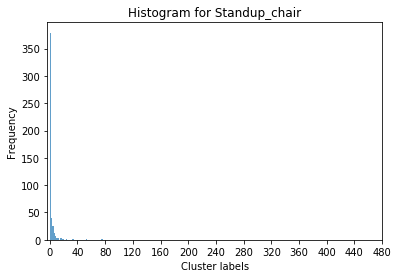

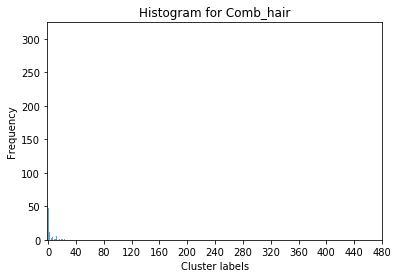

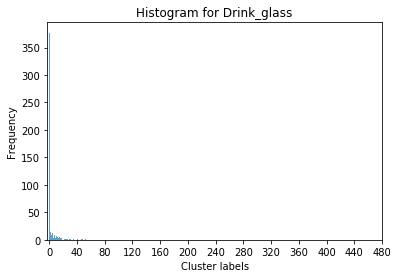

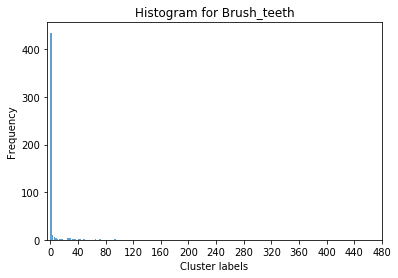

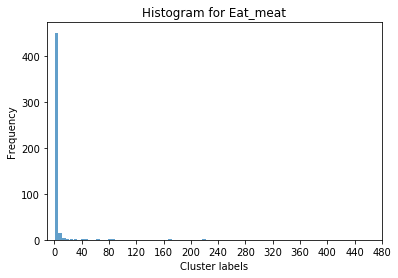

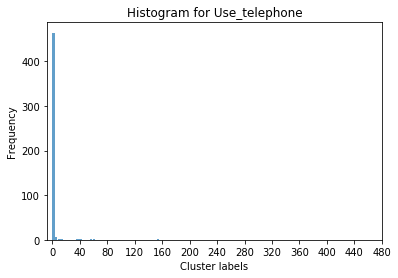

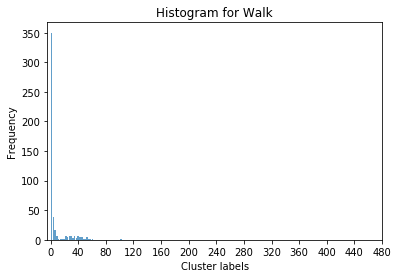

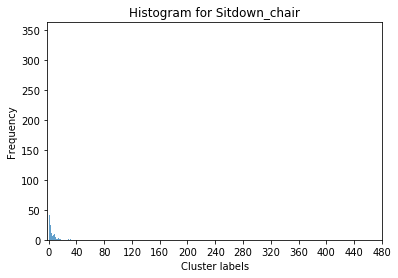

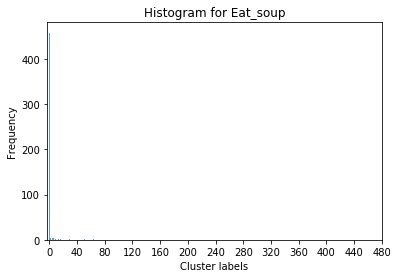

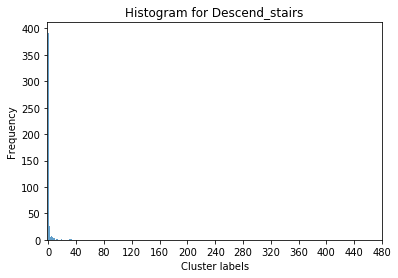

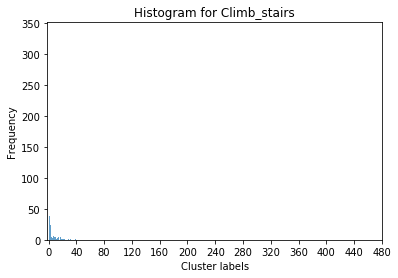

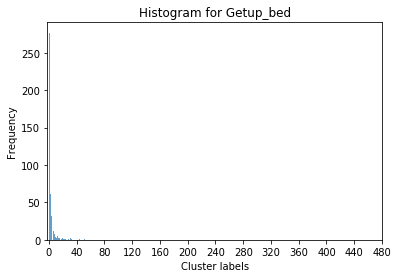

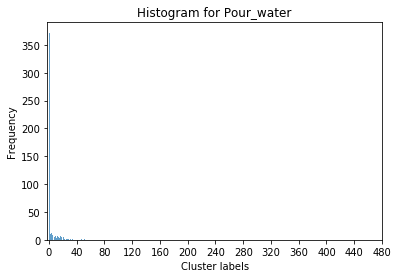

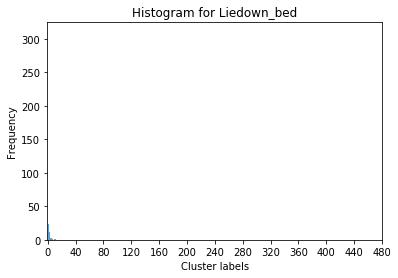

In [58]:
%matplotlib inline 
import matplotlib.pyplot as plt

#vals = np.fromiter(vq_bylabel.itervalues(), dtype=float)
#print vals
for key in label_dict:
   # print np.mean(vq_bylabel[key], axis=0)
    plt.hist(np.mean(label_dict[key], axis=0), bins=40, alpha=0.7, rwidth=0.90)
    plt.xlabel('Cluster labels')
    plt.ylabel('Frequency')
    plt.title("Histogram for " + key)
    plt.xticks(range(0, 481, 40))
    plt.show()

# Classification with random forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

kfolds = KFold(n_splits=3)
avg_error_rate = 0
for train_index, test_index in kfolds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    error_rate = (clf.predict(X_test) != y_test).sum() / float(len(y_test))
    avg_error_rate += error_rate
avg_error_rate /= 3
print avg_error_rate